In [1]:
install.packages("forecast")
install.packages("data.table")
install.packages("ggplot2")
install.packages("lmtest")
install.packages("TTR")
install.packages("lubridate")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [149]:
library(forecast)
library(data.table)
library(ggplot2)
library(lmtest)
library(TTR)
library(lubridate)

# 2. 다음의 각 자료에 대해 적절한 평활법을 적용한 후, 예측오차 분석을 하여 적용한 평활법이 적절했는지 논하여라.

## (1) female.txt : 월별 전문기술행정직에 종사하는 여성 근로자 수

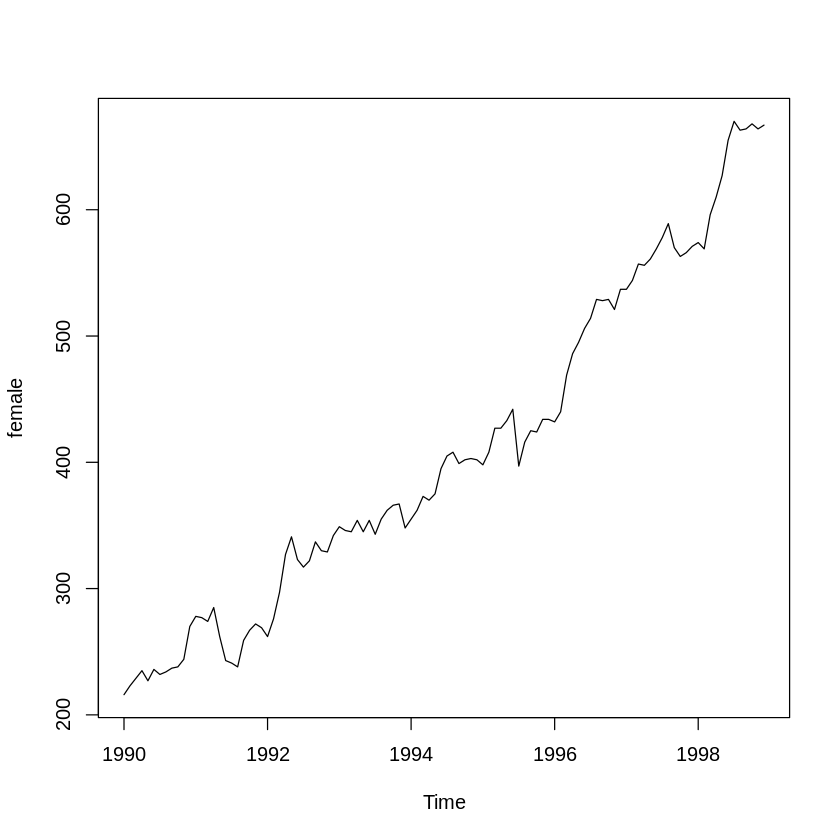

In [150]:
f=scan("female.txt")
female=ts(f,start=c(1990,1),frequency=12)
plot.ts(female)

In [151]:
length(f)

[1] 108

- 추세는 존재하고, 계절성분(?) 은 존재하는 것 같기도 함

- 전반적으로 증가하는 추세가 존재하므로 먼저 이중지수 평활법을 사용하는게 적합할 것 같음

In [152]:
fit1=holt(female,h=12)
fit1$model

Holt's method 

Call:
 holt(y = female, h = 12) 

  Smoothing parameters:
    alpha = 0.9825 
    beta  = 1e-04 

  Initial states:
    l = 214.2297 
    b = 4.1229 

  sigma:  11.4927

     AIC     AICc      BIC 
1039.003 1039.592 1052.414 

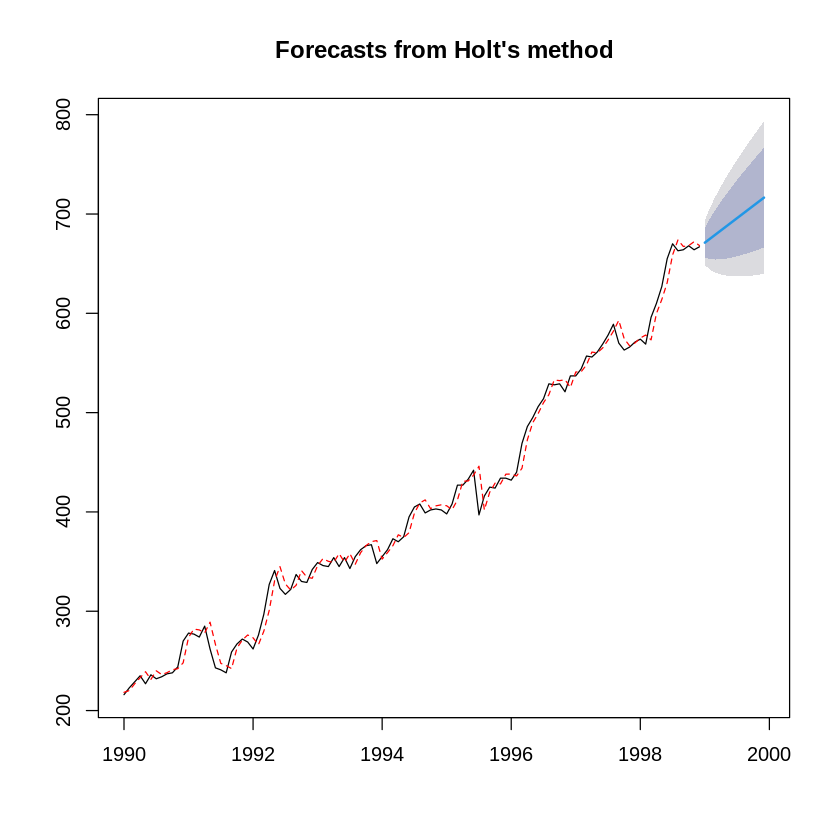

In [153]:
plot(fit1,lty=1,col="black")
lines(fitted(fit1),lty=2,col="red")

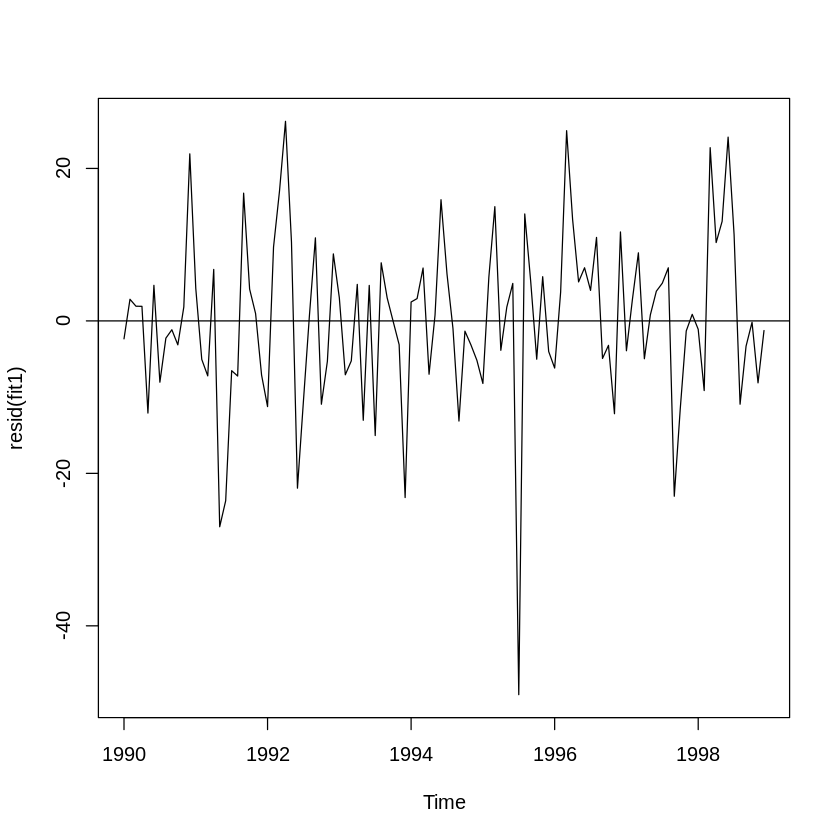

In [154]:
plot(resid(fit1))
abline(h=0)

In [155]:
t.test(resid(fit1))


	One Sample t-test

data:  resid(fit1)
t = 0.06789, df = 107, p-value = 0.946
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -2.087267  2.235301
sample estimates:
 mean of x 
0.07401668 


In [157]:
dwtest(lm(fit1$residual~1))


	Durbin-Watson test

data:  lm(fit1$residual ~ 1)
DW = 1.7721, p-value = 0.116
alternative hypothesis: true autocorrelation is greater than 0


- 계절지수평활법

In [158]:
fit_hw_f=HoltWinters(female)
fit_hw_f

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = female)

Smoothing parameters:
 alpha: 0.5689925
 beta : 0.01533418
 gamma: 1

Coefficients:
          [,1]
a   677.319852
b     4.462732
s1  -10.805353
s2  -10.907550
s3   13.687188
s4   21.650246
s5   29.187883
s6   39.477663
s7   33.205948
s8   19.062994
s9    5.235871
s10  -3.290505
s11 -11.437139
s12 -10.319852

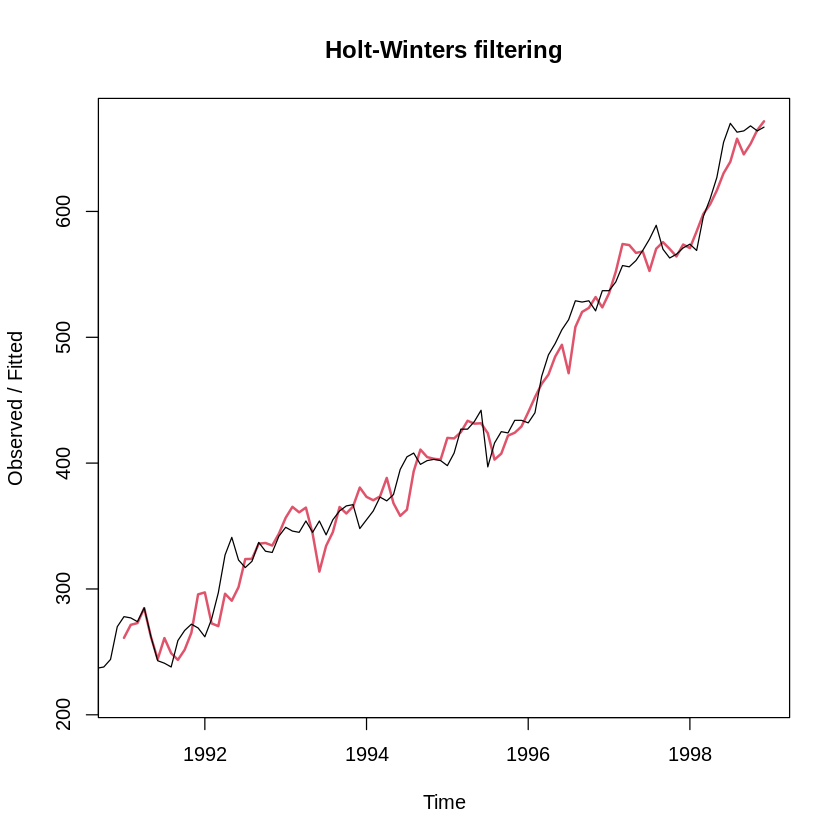

In [159]:
plot(fit_hw_f,lwd=2)

In [169]:
fit_hw_f1=hw(female,alpha=fit_hw_f$alpha,beta=fit_hw_f$beta,gamma=fit_hw_f$gamma,seasonla="additive",initial="simple",h=12)
fit_hw_f1$model

Holt-Winters' additive method 

Call:
 hw(y = female, h = 12, initial = "simple", alpha = fit_hw_f$alpha,  

 Call:
     beta = fit_hw_f$beta, gamma = fit_hw_f$gamma, seasonla = "additive") 

  Smoothing parameters:
    alpha = 0.569 
    beta  = 0.0153 
    gamma = 1 

  Initial states:
    l = 235.0833 
    b = 2.3889 
    s = 34.9167 8.9167 2.9167 1.9167 -1.0833 -3.0833
           0.9167 -8.0833 -0.0833 -6.0833 -12.0833 -19.0833

  sigma:  21.758

In [166]:
sum((female-fitted(fit_hw_f1))^2)

[1] 51128.12

In [168]:
sum((female-fitted(fit_hw_f))^2)

[1] 37871181

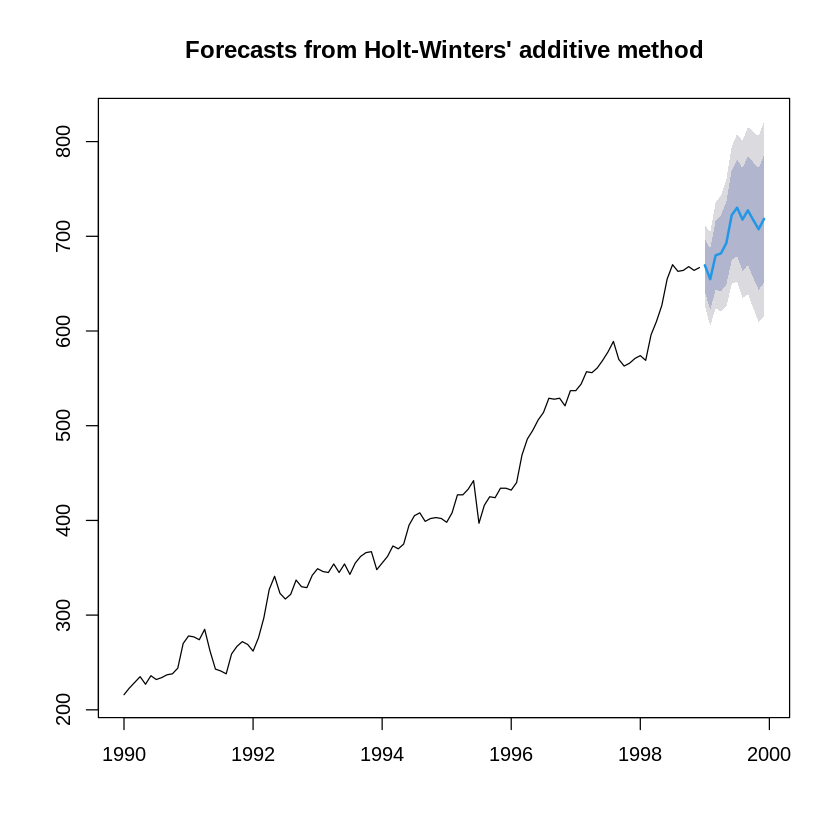

In [170]:
plot(fit_hw_f1)

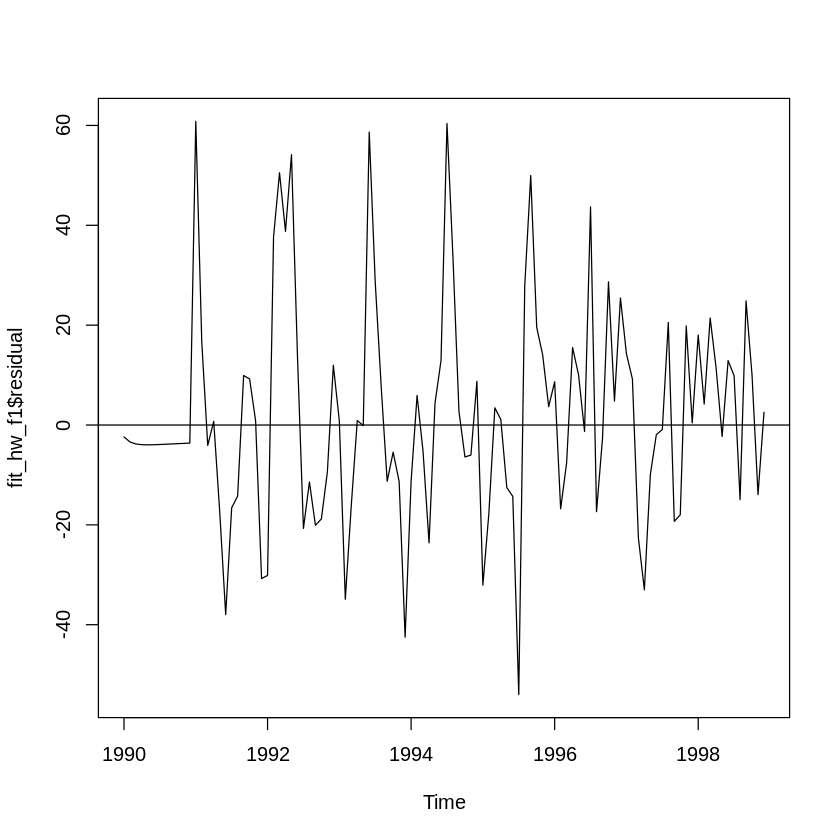

In [171]:
ts.plot(fit_hw_f1$residual)
abline(h=0)

In [172]:
t.test(fit_hw_f1$residual)


	One Sample t-test

data:  fit_hw_f1$residual
t = 0.89819, df = 107, p-value = 0.3711
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -2.271962  6.036348
sample estimates:
mean of x 
 1.882193 


In [174]:
dwtest(lm(fit_hw_f1$residual~1),alternative="two.sided")


	Durbin-Watson test

data:  lm(fit_hw_f1$residual ~ 1)
DW = 1.2847, p-value = 0.0001757
alternative hypothesis: true autocorrelation is not 0


##(2) "export.txt"

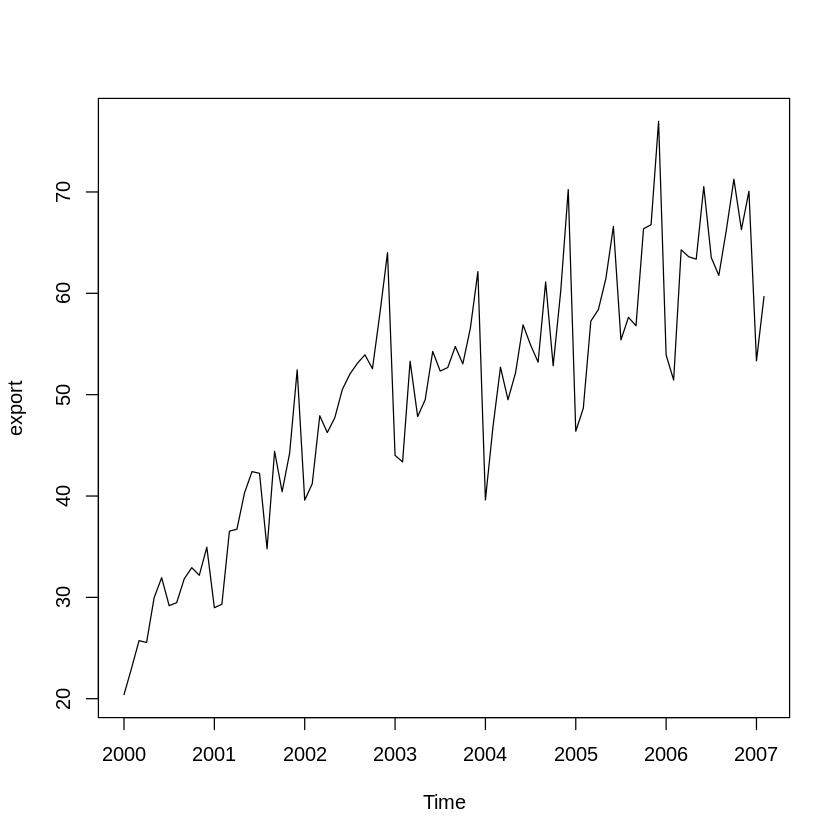

In [175]:
e=scan("export.txt")
export=ts(e,start=c(2000,1),frequency=12)
plot.ts(export)

- 추세는 존재하고 계절성도 존재한다고 얘기할 수 있을 것 같다!
- 이분산성은 없어보이므로 가법모형을 사용해도 될 것 같다

In [176]:
fit_hw_ex=HoltWinters(export)
fit_hw_ex

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = export)

Smoothing parameters:
 alpha: 0.3304767
 beta : 0.04369053
 gamma: 0.6102758

Coefficients:
           [,1]
a    66.9300146
b     0.3670945
s1   -0.9590061
s2   -2.3460160
s3   -1.4388022
s4    4.0020957
s5   -2.8546787
s6   -3.1036803
s7    0.4486017
s8    3.3118493
s9    1.6302355
s10   8.0731659
s11 -11.5480012
s12  -8.8892298

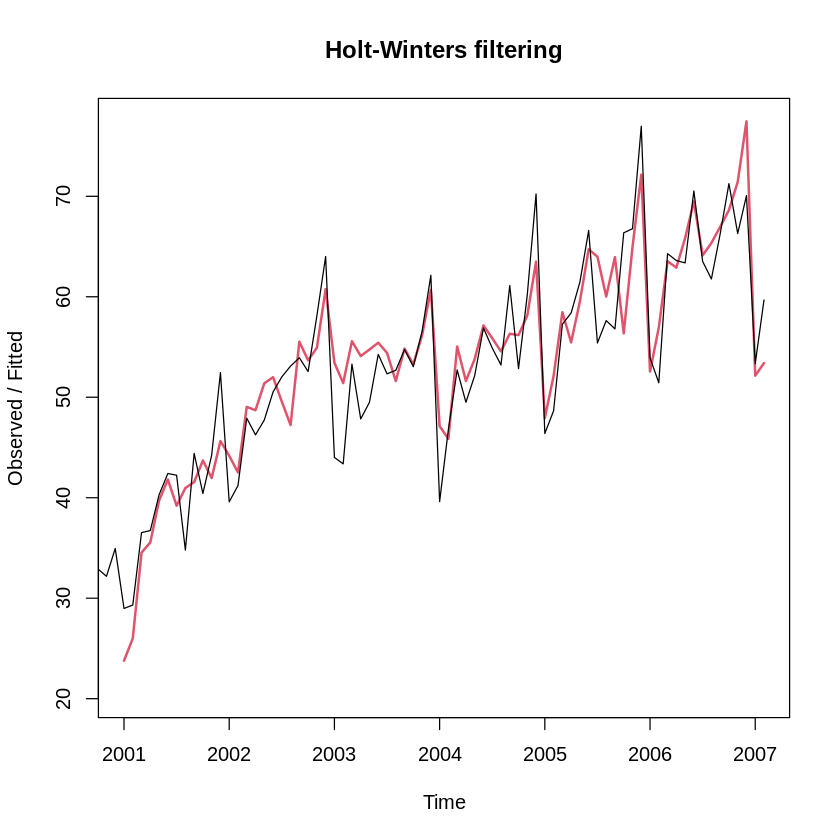

In [177]:
plot(fit_hw_ex,lwd=2)

In [178]:
predict(fit_hw_ex,n.ahead=12,prediction.interval = T,level = 0.95)

,fit,upr,lwr
Mar 2007,66.33810,74.01616,58.66004
Apr 2007,65.31819,73.44013,57.19624
May 2007,66.59250,75.17031,58.01468
Jun 2007,72.40049,81.44570,63.35528
Jul 2007,65.91081,75.43453,56.38708
Aug 2007,66.02890,76.04190,56.01590
Sep 2007,69.94828,80.46097,59.43558
Oct 2007,73.17862,84.20113,62.15611
Nov 2007,71.86410,83.40626,60.32194
Dec 2007,78.67413,90.74554,66.60271


In [285]:
fit_ex=hw(export,alpha=fit_hw_ex$alpha,beta=fit_hw_ex$beta,gamma=fit_hw_ex$gamma,
        seasonal="additive",initial="simple",h=12)
fit_ex$model

Holt-Winters' additive method 

Call:
 hw(y = export, h = 12, seasonal = "additive", initial = "simple",  

 Call:
     alpha = fit_hw_ex$alpha, beta = fit_hw_ex$beta, gamma = fit_hw_ex$gamma) 

  Smoothing parameters:
    alpha = 0.3305 
    beta  = 0.0437 
    gamma = 0.6103 

  Initial states:
    l = 28.9283 
    b = 0.8727 
    s = 6.0217 3.2517 4.0017 2.9017 0.5517 0.2517
           3.0117 1.0317 -3.3783 -3.1983 -5.9183 -8.5283

  sigma:  3.6062

In [286]:
fit_ex

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Mar 2007       66.50720 61.88563 71.12876 59.43913 73.57527
Apr 2007       65.68937 60.75488 70.62385 58.14273 73.23601
May 2007       66.24118 60.94227 71.54010 58.13720 74.34517
Jun 2007       72.67945 66.96731 78.39158 63.94349 81.41541
Jul 2007       64.91363 58.74267 71.08458 55.47597 74.35129
Aug 2007       64.37679 57.70471 71.04886 54.17273 74.58085
Sep 2007       68.55746 61.34513 75.76980 57.52715 79.58778
Oct 2007       73.46214 65.67331 81.25096 61.55016 85.37412
Nov 2007       70.59181 62.19288 78.99075 57.74675 83.43688
Dec 2007       77.57678 68.53640 86.61715 63.75071 91.40284
Jan 2008       59.96274 50.25161 69.67388 45.11085 74.81464
Feb 2008       63.40430 52.99484 73.81375 47.48440 79.32419

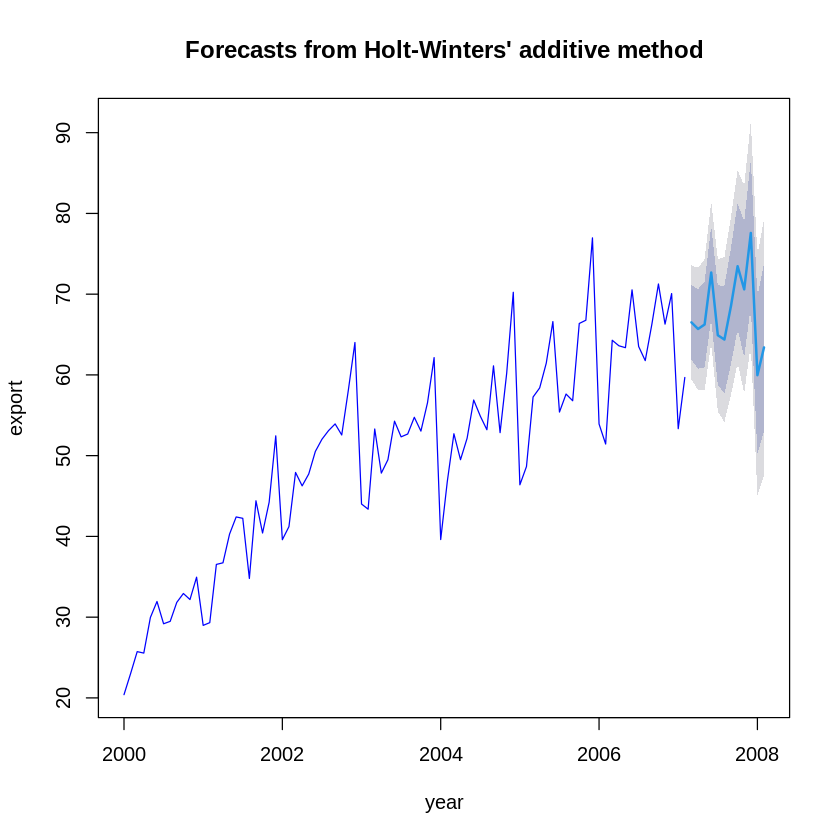

In [287]:
plot(fit_ex,xlab="year",ylab="export",lty=1,col="blue")

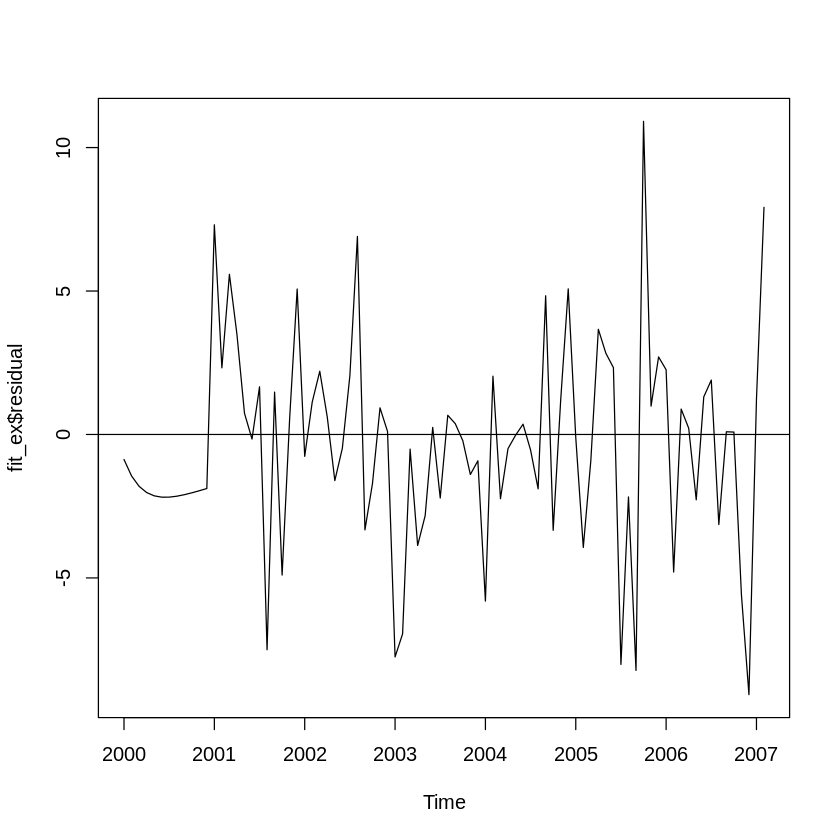

In [288]:
ts.plot(fit_ex$residual)
abline(h=0)

In [289]:
t.test(fit_ex$residual)


	One Sample t-test

data:  fit_ex$residual
t = -1.0848, df = 85, p-value = 0.2811
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -1.1937802  0.3509863
sample estimates:
 mean of x 
-0.4213969 


In [290]:
dwtest(lm(fit_ex$residual~1),alternative="two.sided")


	Durbin-Watson test

data:  lm(fit_ex$residual ~ 1)
DW = 1.8443, p-value = 0.4681
alternative hypothesis: true autocorrelation is not 0


In [291]:
sum((export-fitted(fit_ex))^2)

[1] 1118.418

- HW01에서 적합시켰던 추세모형

In [186]:
e_y=factor(cycle(export))
e_t=1:length(export)
e_m=lm(export~0+e_t+e_y)
summary(e_m)


Call:
lm(formula = export ~ 0 + e_t + e_y)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.8562  -2.2938   0.1567   2.6730   9.3951 

Coefficients:
      Estimate Std. Error t value Pr(>|t|)    
e_t    0.43721    0.01893   23.10   <2e-16 ***
e_y1  21.98000    1.73500   12.67   <2e-16 ***
e_y2  23.69779    1.74396   13.59   <2e-16 ***
e_y3  31.19741    1.79669   17.36   <2e-16 ***
e_y4  29.35163    1.80455   16.27   <2e-16 ***
e_y5  31.28299    1.81257   17.26   <2e-16 ***
e_y6  34.94578    1.82076   19.19   <2e-16 ***
e_y7  31.14286    1.82910   17.03   <2e-16 ***
e_y8  29.71422    1.83760   16.17   <2e-16 ***
e_y9  33.05273    1.84626   17.90   <2e-16 ***
e_y10 32.66409    1.85507   17.61   <2e-16 ***
e_y11 34.35545    1.86403   18.43   <2e-16 ***
e_y12 40.55967    1.87314   21.65   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.334 on 73 degrees of freedom
Multiple R-squared:  0.994,	Adjusted R-squared:  0.9929

In [189]:
sum((export-fitted(e_m))^2)

[1] 1371.057

#3. "data1.csv"는 모의실험에 의해 생성된 시계열자료이다. 다음 물음에 답하여라

In [21]:
d=read.csv("data1.csv")
head(d$z)

[1] -1.5346871  2.6850469 -0.4288189  1.3724199 -0.9800884  2.4156505

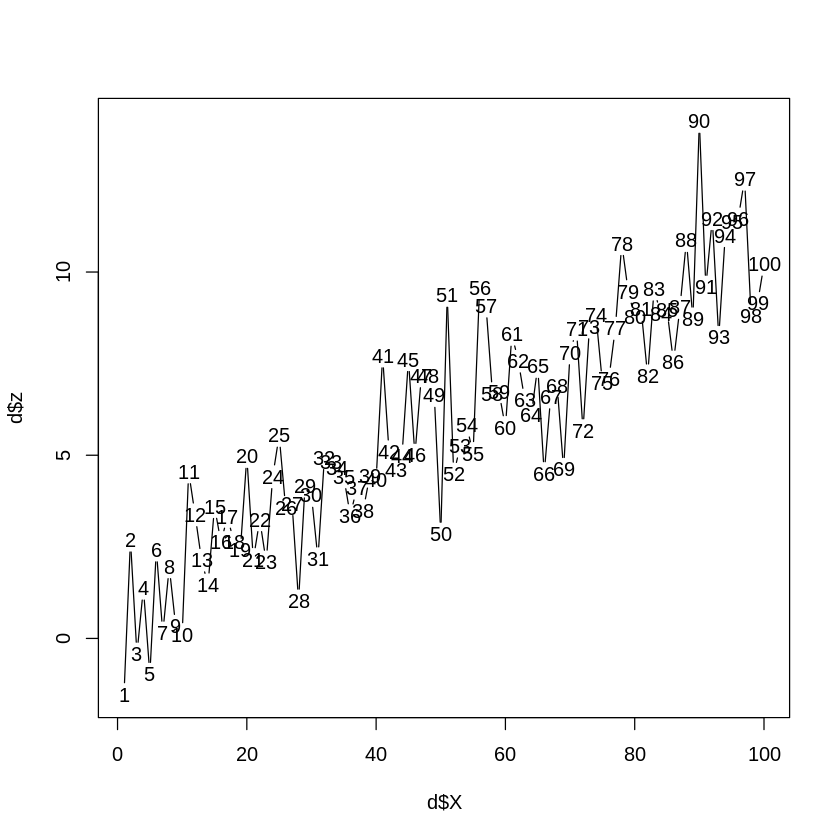

In [22]:
plot.ts(d$X,d$z)

In [23]:
data1=ts(d$z,d$t)

- 데이터를 확인해보니 이분산성은 존재하지 않는것같으므로 로그변환을 할 필요성은 없어보임
- 추세는 존재하고 계절성분이 존재하는지는 잘 모르겠음

##(1) 적절한 추세모형을 적합시킨 후 잔차분석을 하여라

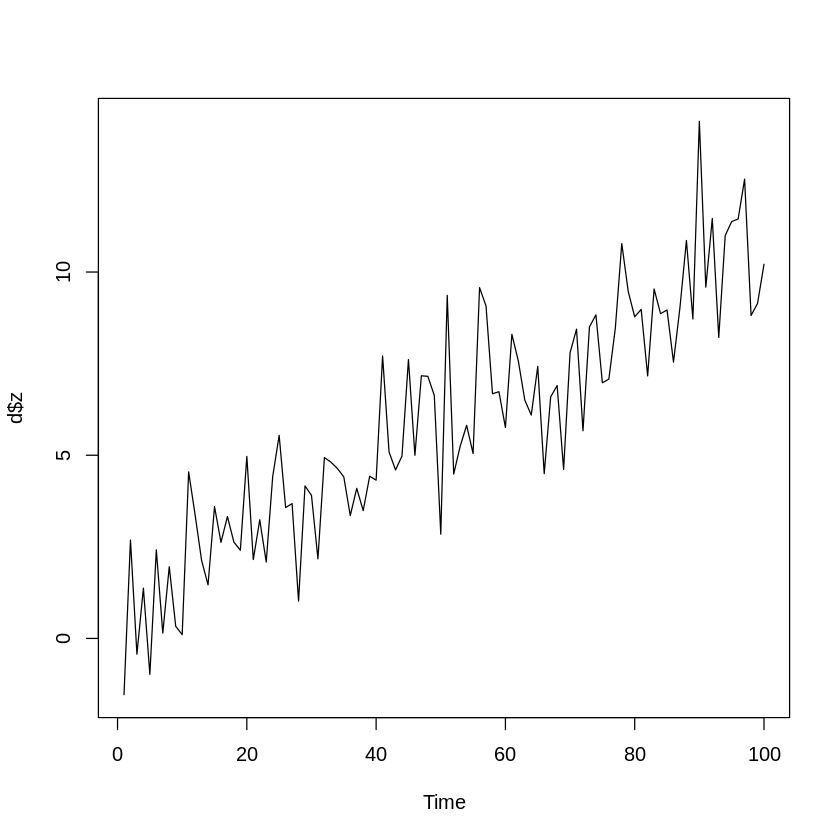

In [463]:
dt=ts(d$z,frequency=6)
plot.ts(d$z)


In [464]:
dt_y=factor(cycle(dt))
dt_t=1:length(dt)


In [465]:
reg_dt=lm(d$z~0+dt_t+dt_y)
summary(reg_dt)


Call:
lm(formula = d$z ~ 0 + dt_t + dt_y)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2038 -1.0567 -0.1335  0.8308  4.0179 

Coefficients:
      Estimate Std. Error t value Pr(>|t|)    
dt_t  0.099766   0.005131  19.445   <2e-16 ***
dt_y1 0.710902   0.438272   1.622   0.1082    
dt_y2 0.915383   0.441235   2.075   0.0408 *  
dt_y3 0.682005   0.444238   1.535   0.1281    
dt_y4 0.322933   0.447279   0.722   0.4721    
dt_y5 1.159787   0.450270   2.576   0.0116 *  
dt_y6 1.116567   0.453213   2.464   0.0156 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.48 on 93 degrees of freedom
Multiple R-squared:  0.9543,	Adjusted R-squared:  0.9509 
F-statistic: 277.6 on 7 and 93 DF,  p-value: < 2.2e-16


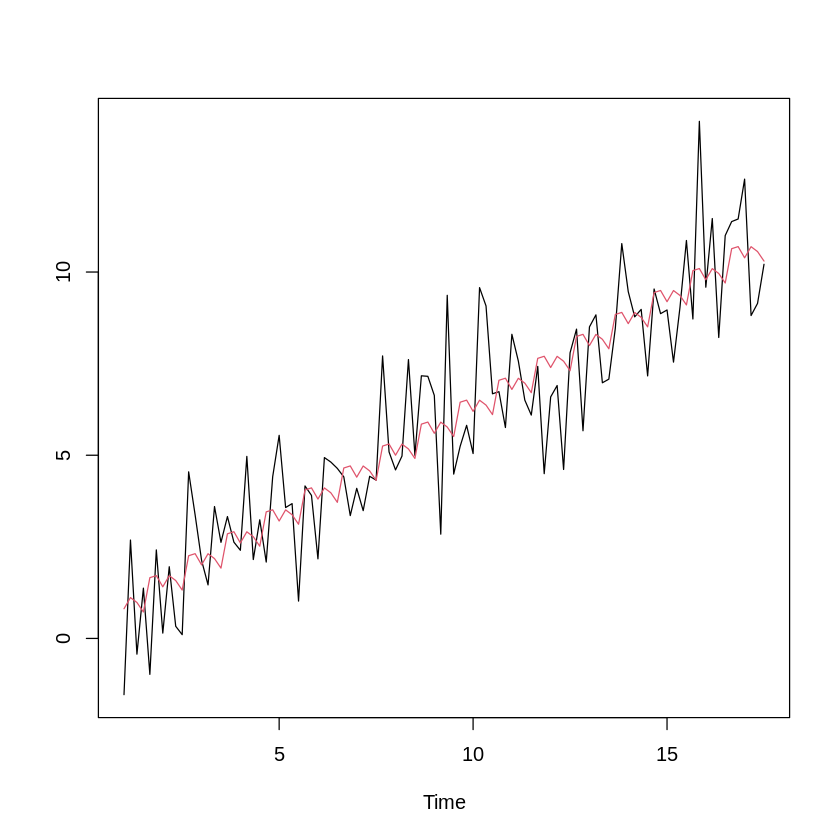

In [466]:
ts.plot(dt,fitted(reg_dt),col=1:2)

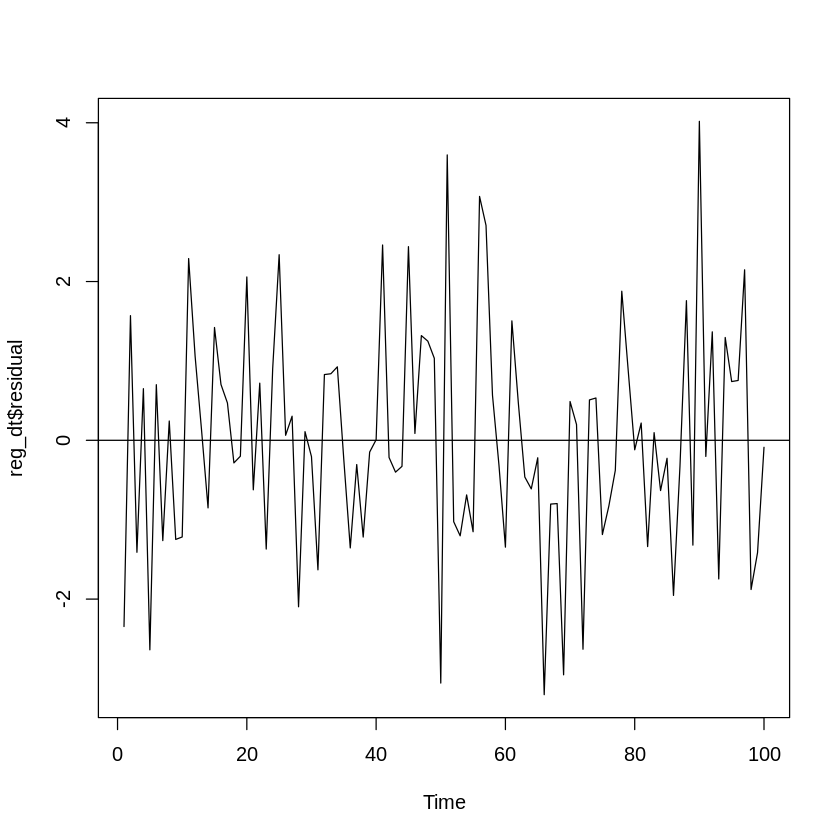

In [467]:
plot.ts(reg_dt$residual)#frequency=9
abline(h=0)

In [468]:
t.test(reg_dt$residual)


	One Sample t-test

data:  reg_dt$residual
t = 1.7207e-17, df = 99, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.2846623  0.2846623
sample estimates:
   mean of x 
2.468593e-18 


In [469]:
dwtest(reg_dt)


	Durbin-Watson test

data:  reg_dt
DW = 2.228, p-value = 0.8669
alternative hypothesis: true autocorrelation is greater than 0


##(2) (1)에서 적합한 추세모형에서 1~10시차 후의 예측값

In [484]:
df=data.frame(
    dt_t=length(dt)+(1:10),
    dt_y=factor(c(5,6,1,2,3,4,5,6,1,2))
)

In [485]:
pred_dt=predict(reg_dt,newdata=df)
pred_dt

1        2        3        4        5        6        7        8 
11.23611 11.29266 10.98676 11.29100 11.15739 10.89809 11.83471 11.89125 
       9       10 
11.58535 11.88960

##(3) 평활법 적용

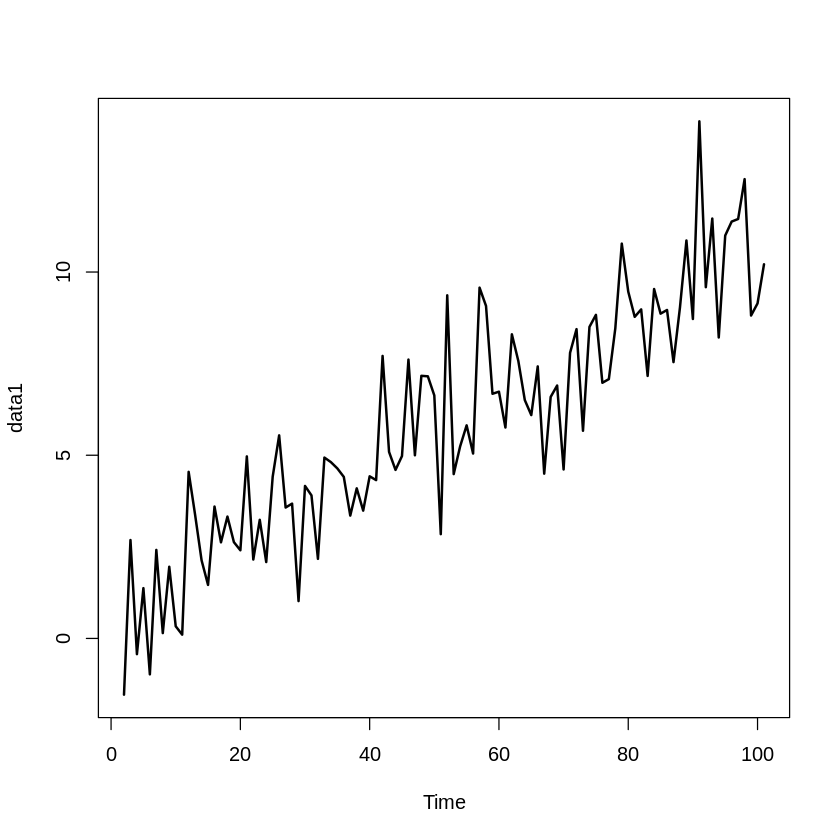

In [40]:
plot(data1,lwd=2)

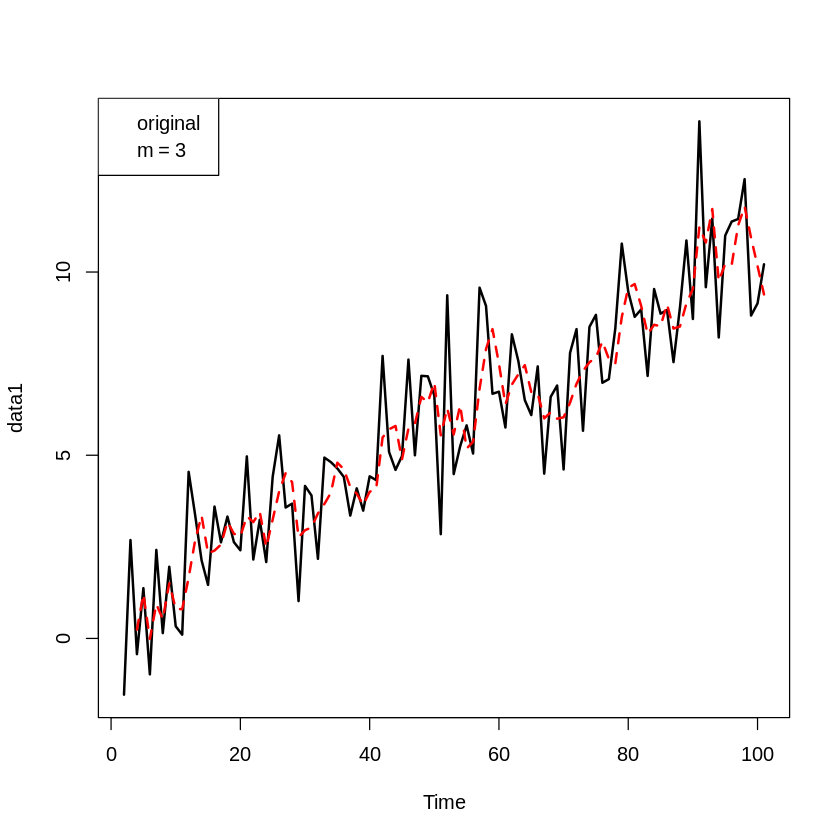

In [41]:
data1SMA3=SMA(data1,n=3) #3평활
plot.ts(data1,lwd=2)
lines(data1SMA3,col="red",lwd=2,lty=2)
legend("topleft",c("original",expression(m==3)))

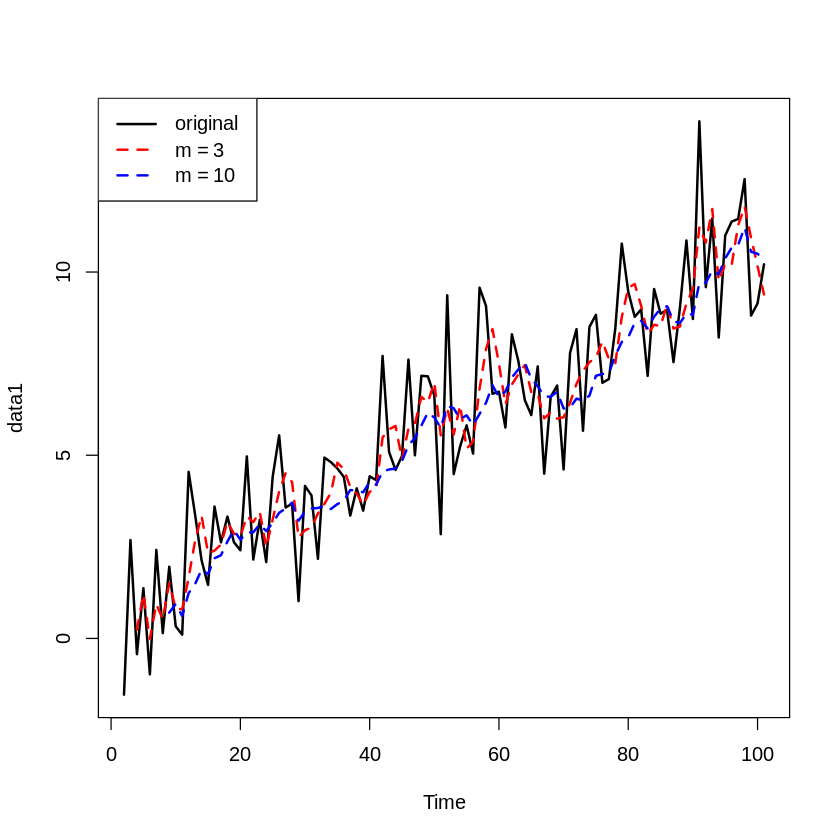

In [42]:
##window=3 vs 10
plot.ts(data1,lwd=2)
lines(data1SMA3,col="red",lty=2,lwd=2)
lines(SMA(data1,n=8),col="blue",lty=2,lwd=2)
legend("topleft",legend=c("original",expression(m==3),expression(m==10)),col=c("black","red","blue"),lty=c(1,2,2),lwd=2)

#### 모형 평가

In [279]:
sum((data1-data1SMA3)^2,na.rm=T)
mean((data1-SMA(data1,n=8))^2,na.rm=T)

[1] 134.7923

[1] 1.920795

### 이중지수평활법

- 이중지수평활 α,β 추정

In [44]:
fit_d2=holt(data1,h=10)  #자동추정
fit_d2$model

Holt's method 

Call:
 holt(y = data1, h = 10) 

  Smoothing parameters:
    alpha = 0.0427 
    beta  = 1e-04 

  Initial states:
    l = 0.1376 
    b = 0.1041 

  sigma:  1.5238

     AIC     AICc      BIC 
550.6720 551.3103 563.6979 

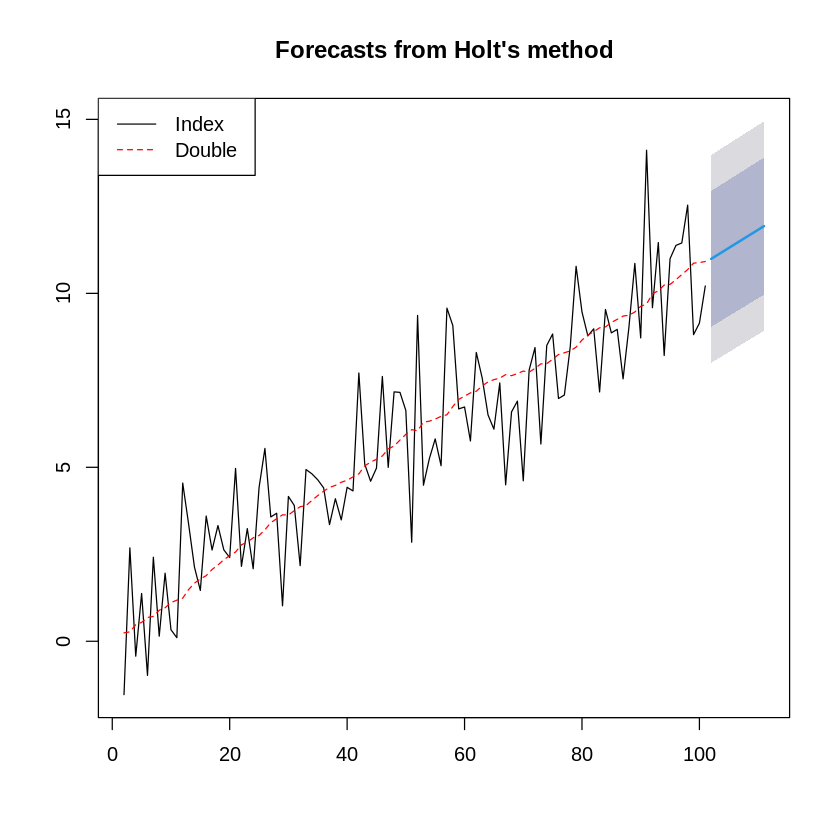

In [45]:
plot(fit_d2,lty=1,col="black")
lines(fitted(fit_d2),col="red",lty=2)
legend("topleft",lty=1:2,col=c("black","red"),c("Index","Double"))

- 잔차

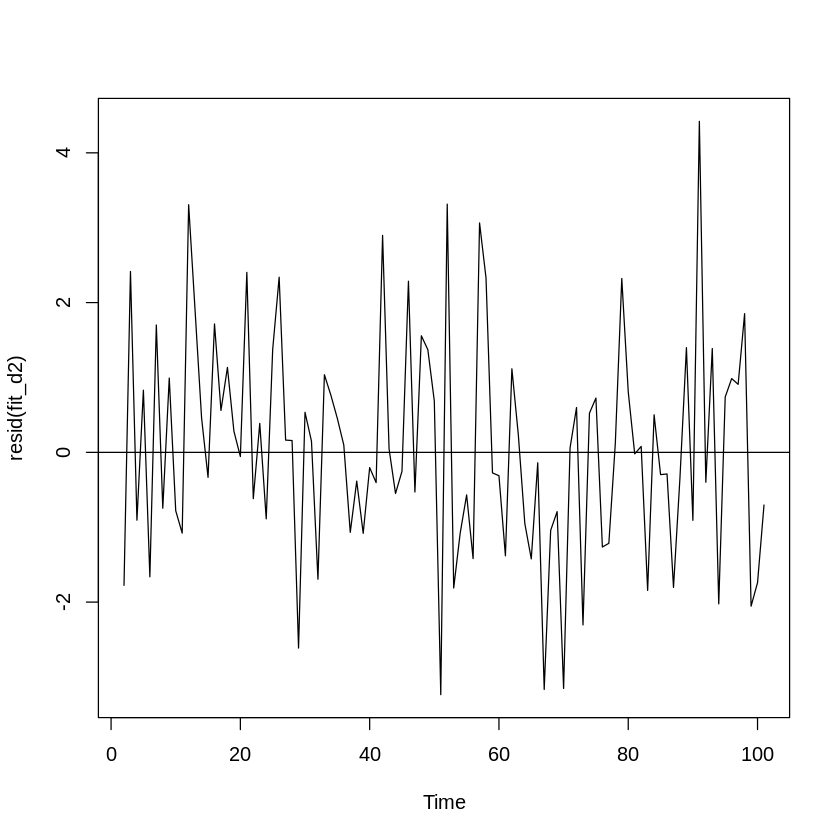

In [46]:
plot(resid(fit_d2))
abline(h=0)

In [47]:
t.test(resid(fit_d2))


	One Sample t-test

data:  resid(fit_d2)
t = 0.39227, df = 99, p-value = 0.6957
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.2386872  0.3563151
sample estimates:
 mean of x 
0.05881397 


In [48]:
fit_d2

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
102       10.99007 9.037283 12.94286 8.003540 13.97660
103       11.09479 9.140220 13.04937 8.105531 14.08406
104       11.19952 9.243151 13.15589 8.207512 14.19153
105       11.30424 9.346075 13.26241 8.309482 14.29900
106       11.40897 9.448992 13.36894 8.411443 14.40649
107       11.51369 9.551902 13.47548 8.513393 14.51399
108       11.61842 9.654806 13.58203 8.615333 14.62150
109       11.72314 9.757703 13.68858 8.717262 14.72902
110       11.82787 9.860593 13.79514 8.819181 14.83655
111       11.93259 9.963477 13.90171 8.921090 14.94409

###계절지수평활

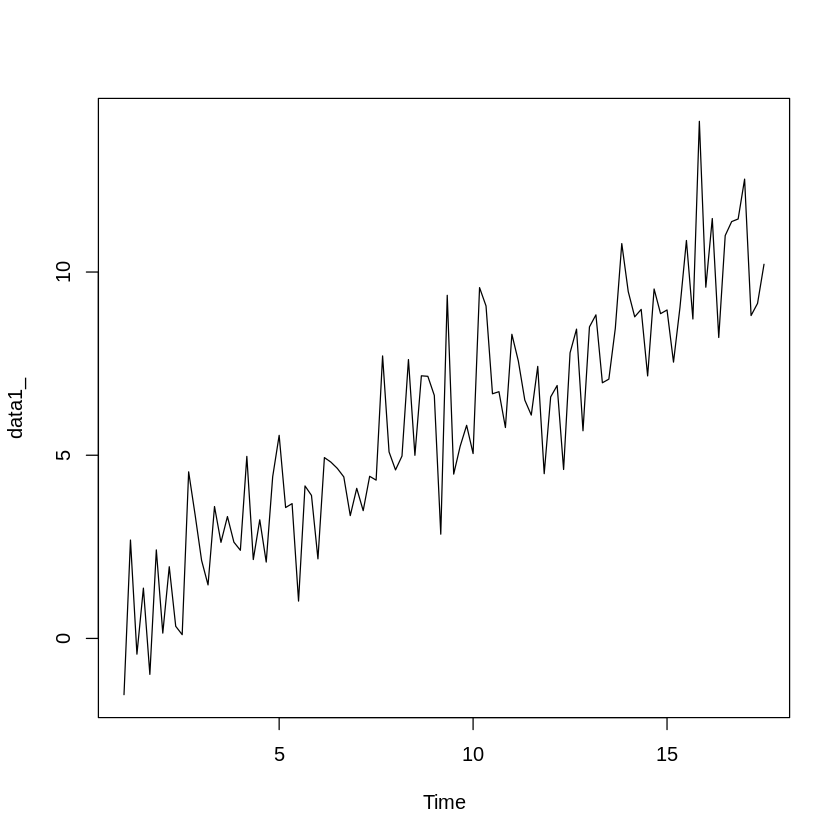

In [487]:
data1_=ts(data1,start=1,frequency=6)
plot.ts(data1_)

- 주기를 확인하기 어려워서 frequency가 6이라고 가정한 임시 ts데이터선언


####HoltWinter additive model

In [488]:
fit_d_hw=HoltWinters(data1_)
fit_d_hw

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = data1_)

Smoothing parameters:
 alpha: 0.07171534
 beta : 0.0490251
 gamma: 0.2849466

Coefficients:
         [,1]
a  11.5962437
b   0.1068319
s1 -0.3765308
s2  0.3094488
s3 -0.2013940
s4 -1.1355985
s5 -1.6675184
s6 -0.8774997

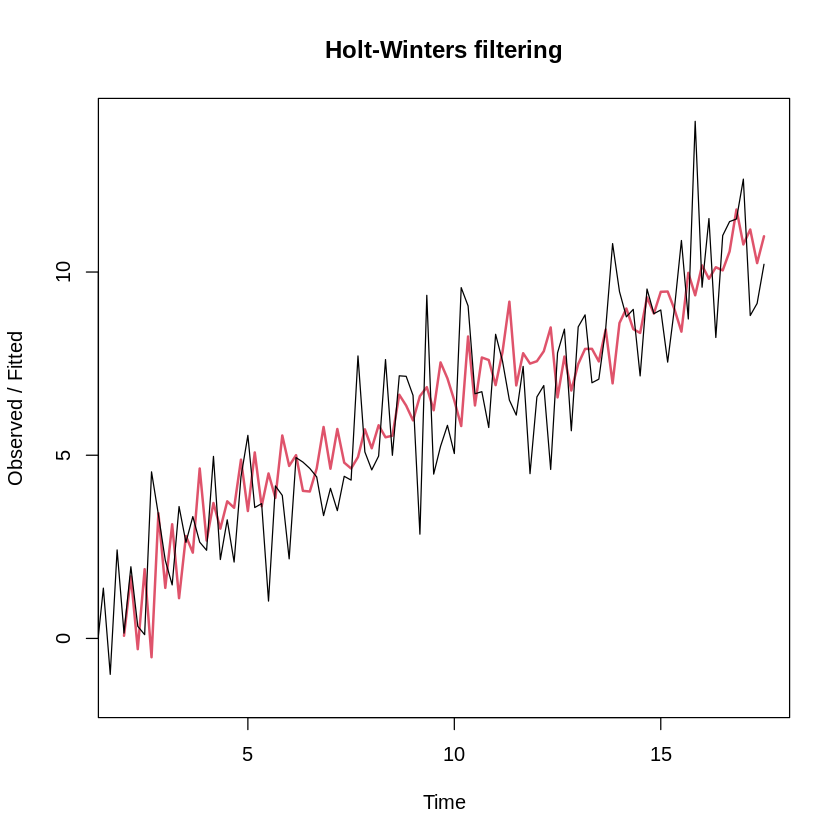

In [489]:
plot(fit_d_hw,lwd=2)

In [490]:
pred_dt_hw=predict(fit_d_hw,n.ahead=10)
pred_dt_hw

fit
11.32654
12.11936
11.71535
10.88797
10.46288
11.35974
11.96754
12.76035
12.35634
11.52896


In [491]:
fit_d_hw1=hw(data1_,alpha=fit_d_hw$alpha,beta=fit_d_hw$beta,gamma=fit_d_hw$gamma,
            seasonal="additive",initial="simple",h=10)
fit_d_hw1$model

Holt-Winters' additive method 

Call:
 hw(y = data1_, h = 10, seasonal = "additive", initial = "simple",  

 Call:
     alpha = fit_d_hw$alpha, beta = fit_d_hw$beta, gamma = fit_d_hw$gamma) 

  Smoothing parameters:
    alpha = 0.0717 
    beta  = 0.049 
    gamma = 0.2849 

  Initial states:
    l = 0.5883 
    b = 0.1924 
    s = 1.8274 -1.5683 0.7842 -1.0171 2.0968 -2.1229

  sigma:  1.6757

In [492]:
fit_d_hw1

         Point Forecast     Lo 80    Hi 80    Lo 95    Hi 95
17.66667       11.32711  9.179610 13.47461 8.042791 14.61143
17.83333       12.18500 10.021897 14.34810 8.876821 15.49317
18.00000       11.73981  9.546207 13.93342 8.384981 15.09465
18.16667       10.84541  8.602053 13.08878 7.414489 14.27634
18.33333       10.39788  8.081963 12.71379 6.855993 13.93976
18.50000       11.36886  8.955058 13.78265 7.677271 15.06044
18.66667       11.96690  9.177675 14.75612 7.701150 16.23265
18.83333       12.82478  9.896709 15.75286 8.346681 17.30288
19.00000       12.37960  9.286681 15.47252 7.649389 17.10981
19.16667       11.48520  8.201980 14.76842 6.463947 16.50646

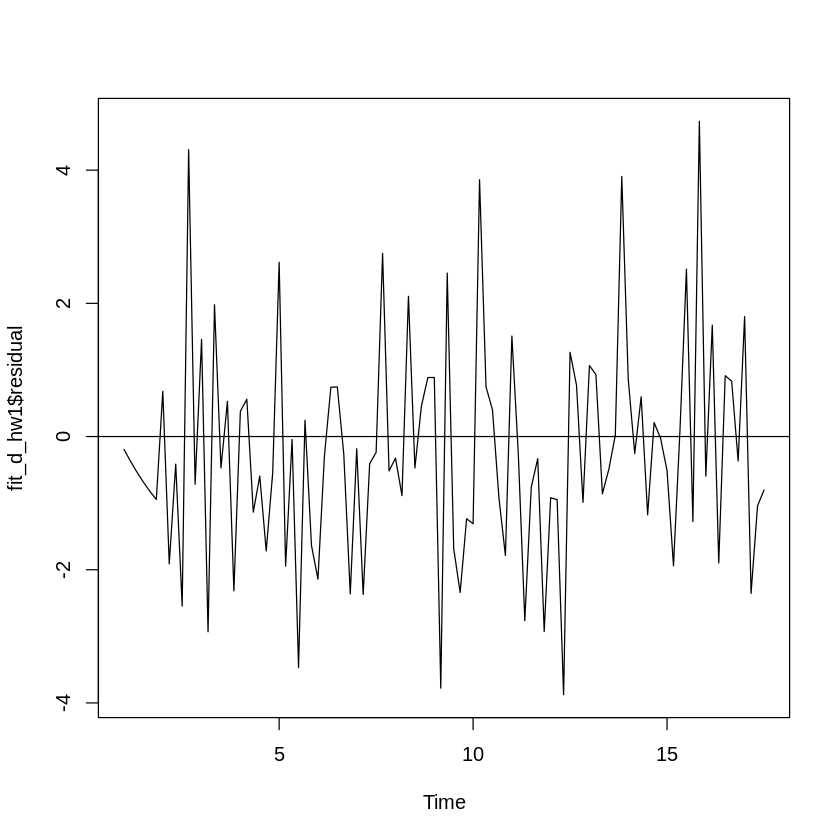

In [493]:
ts.plot(fit_d_hw1$residual)
abline(h=0)

In [494]:
t.test(fit_d_hw1$residual)


	One Sample t-test

data:  fit_d_hw1$residual
t = -1.4647, df = 99, p-value = 0.1462
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.57465672  0.08655986
sample estimates:
 mean of x 
-0.2440484 


In [495]:
dwtest(lm(fit_d_hw1$residual~1),alternative="two.sided")


	Durbin-Watson test

data:  lm(fit_d_hw1$residual ~ 1)
DW = 2.4072, p-value = 0.03975
alternative hypothesis: true autocorrelation is not 0


- 양의 상관관계

##(5) 결과비교

In [496]:
new_dt=read.csv("data1_new.csv")
new_dt$z

[1] 11.577471 13.171004 12.730258 12.242375 10.877077 13.297355 14.632224
 [8] 15.049088  9.671734 12.216420

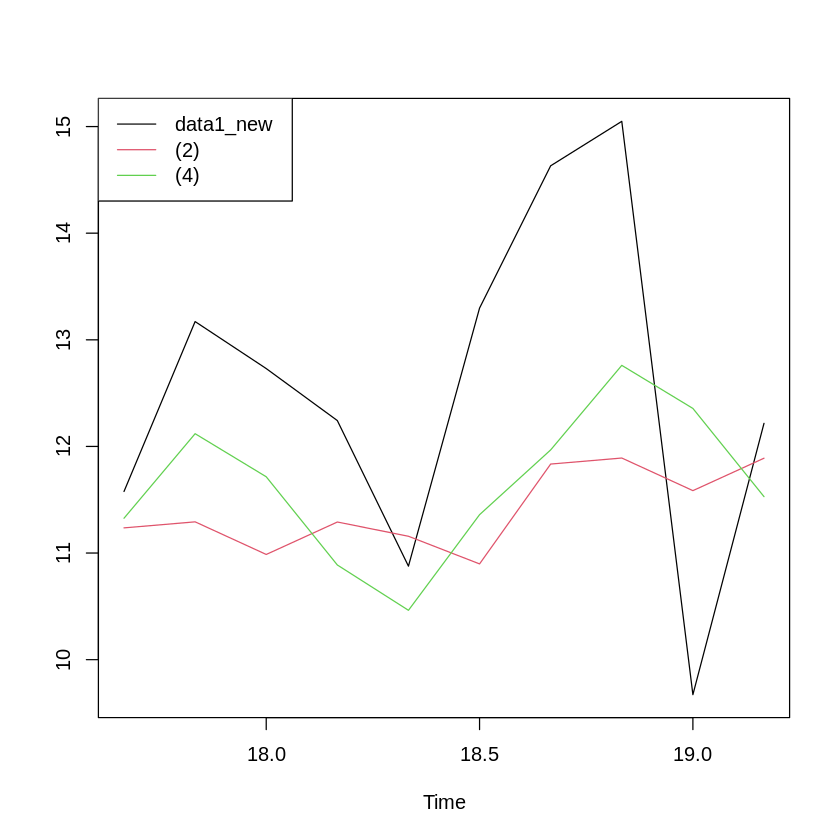

In [500]:
ts.plot(new_dt$z,pred_dt,pred_dt_hw,col=1:3)
legend("topleft",lty=1,col=1:3,c("data1_new","(2)","(4)"))

# 4. "export.txt" 자료에 대해 각각 다음 물음에 답하여라

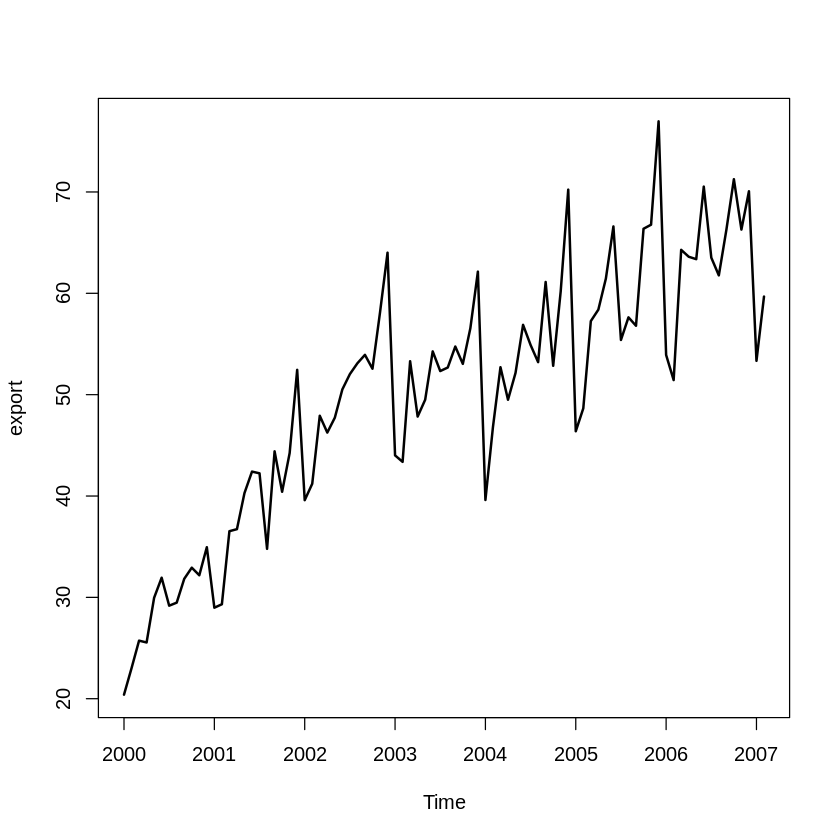

In [246]:
e=scan("export.txt")
t=1:length(e)
export=ts(e,start=c(2000,1),frequency=12)
plot.ts(export,lwd=2)

## (1) 추세분석을 이용한 분해법에 의한 각 성분의 시계열 그림을 그려라

- 추세성분 추정

In [247]:
fit_e=lm(export~t)
summary(fit_e)


Call:
lm(formula = export ~ t)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.1230  -4.0245  -0.6699   4.1819  17.3619 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30.62075    1.37454   22.28   <2e-16 ***
t            0.44520    0.02744   16.22   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.318 on 84 degrees of freedom
Multiple R-squared:  0.758,	Adjusted R-squared:  0.7552 
F-statistic: 263.2 on 1 and 84 DF,  p-value: < 2.2e-16


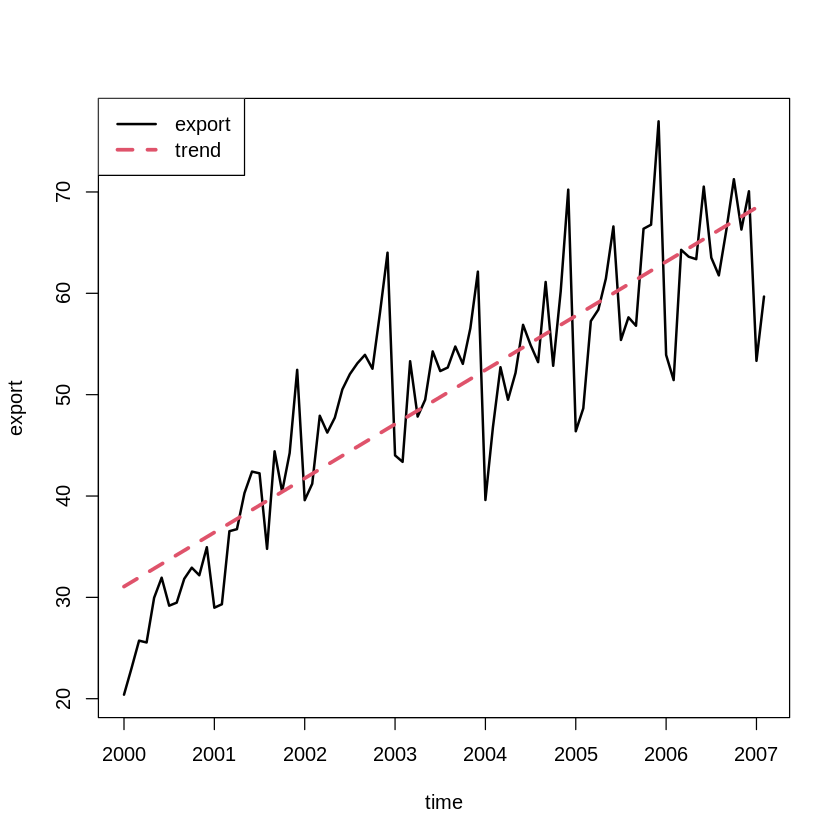

In [248]:
hat_Tte=fitted(fit_e)
ts.plot(export,hat_Tte,col=1:2,lty=1:2,lwd=2:3,xlab="time",ylab="export")
legend("topleft",lty=1:2,col=1:2,lwd=2:3,c("export","trend"))

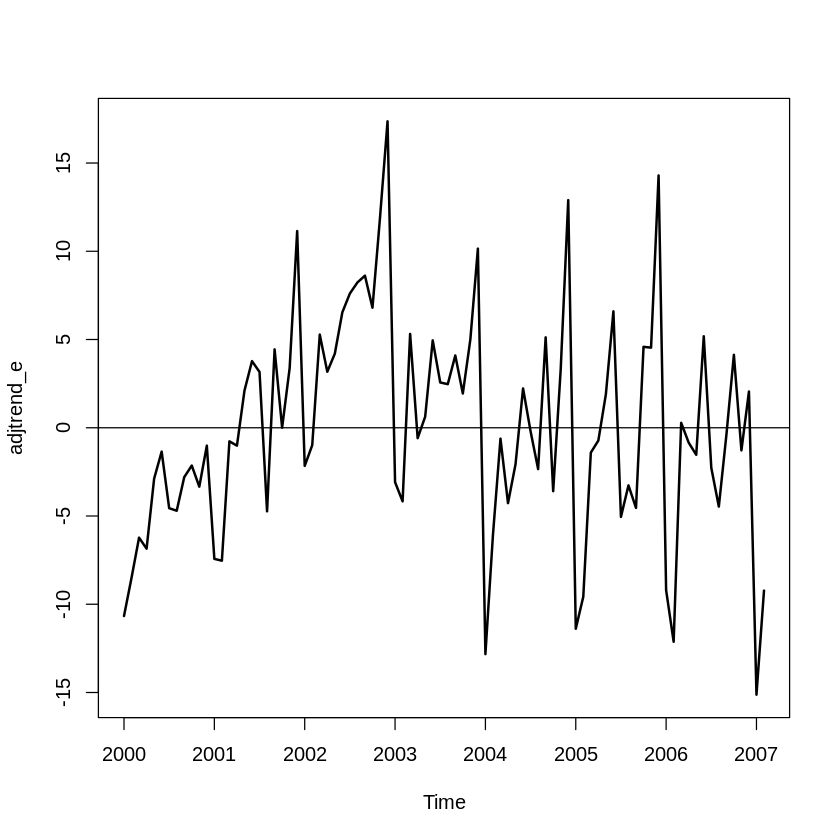

In [249]:
adjtrend_e=export-hat_Tte
plot.ts(adjtrend_e,lwd=2)
abline(h=0)

In [251]:
dwtest(lm(adjtrend_e~1))


	Durbin-Watson test

data:  lm(adjtrend_e ~ 1)
DW = 1.3267, p-value = 0.0006261
alternative hypothesis: true autocorrelation is greater than 0


- 추세성분 추정 ~ 제곱항을 이용

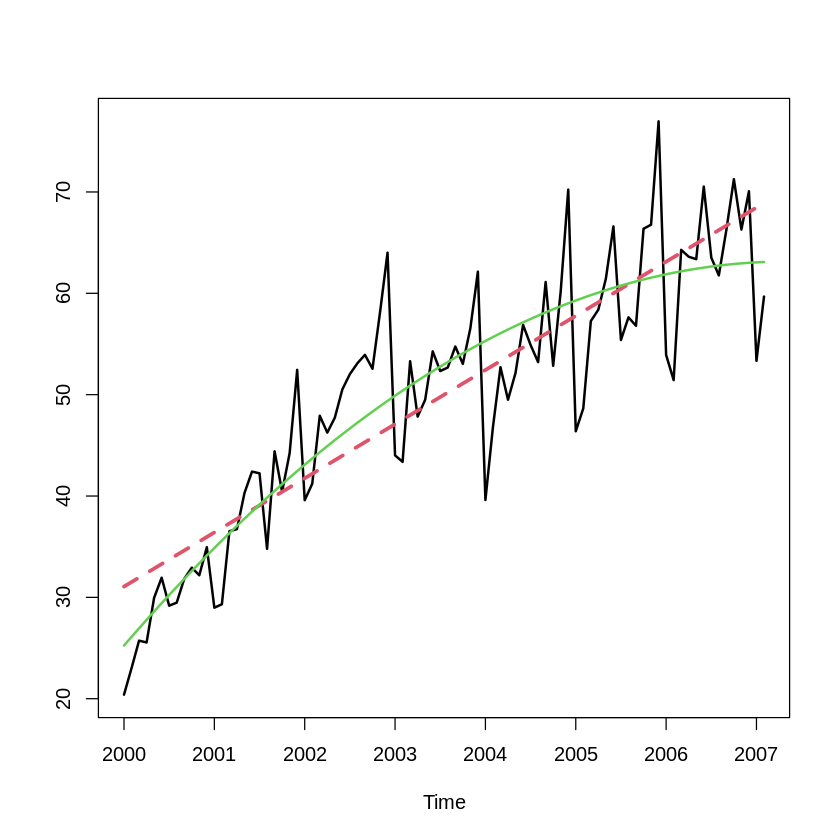

In [252]:
fit_e1=lm(export~t)
fit_e2=lm(export~t+I(t^2))

ts.plot(export,fitted(fit_e1),fitted(fit_e2),col=1:3,lty=1:2,lwd=2:3)

In [255]:
summary(fit_e2)


Call:
lm(formula = export ~ t + I(t^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-15.6907  -3.3962   0.0991   3.2700  15.2529 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 24.382314   1.898857  12.841  < 2e-16 ***
t            0.870551   0.100738   8.642 3.40e-13 ***
I(t^2)      -0.004889   0.001122  -4.358 3.74e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.734 on 83 degrees of freedom
Multiple R-squared:  0.8031,	Adjusted R-squared:  0.7983 
F-statistic: 169.3 on 2 and 83 DF,  p-value: < 2.2e-16


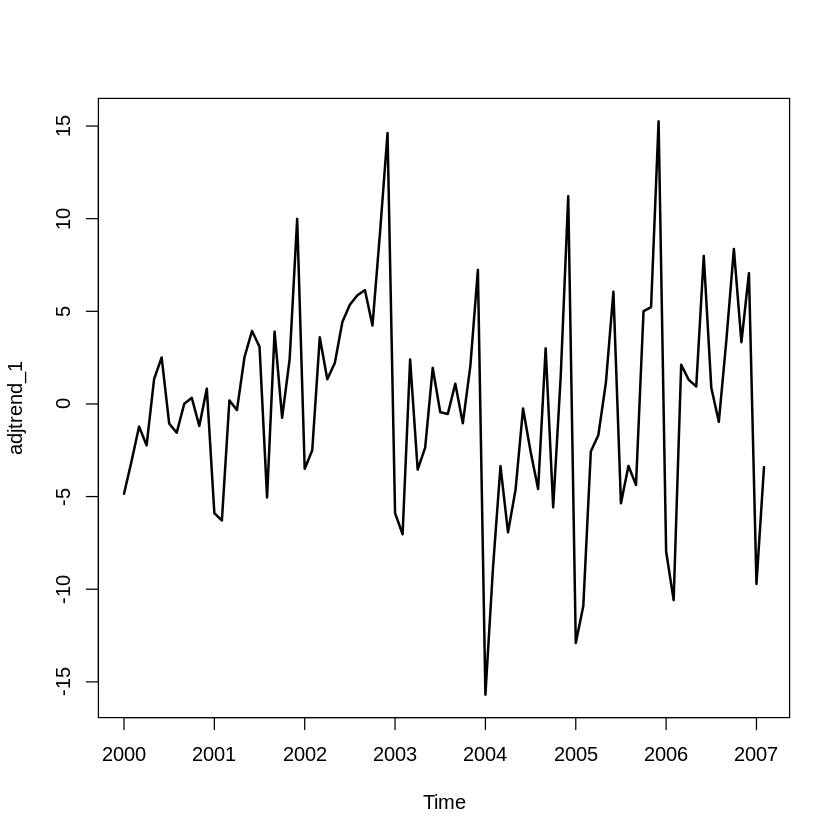

In [253]:
hat_Tte2=fitted(fit_e2)
adjtrend_1=export-hat_Tte2
plot.ts(adjtrend_1,lwd=2)

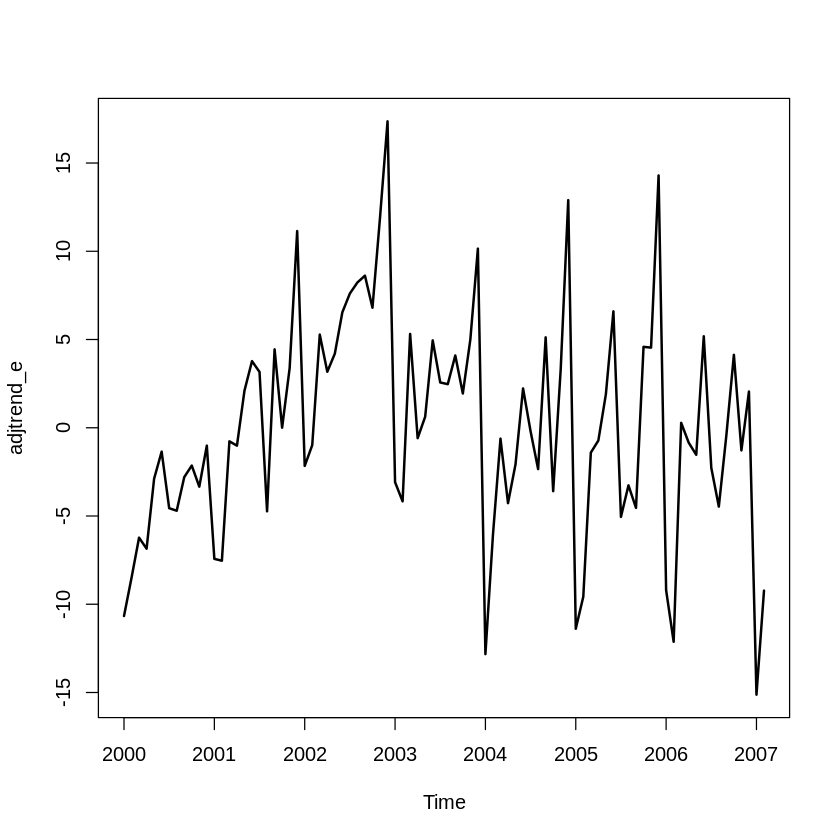

In [64]:
adjtrend_e=export-hat_Tte
plot.ts(adjtrend_e,lwd=2)


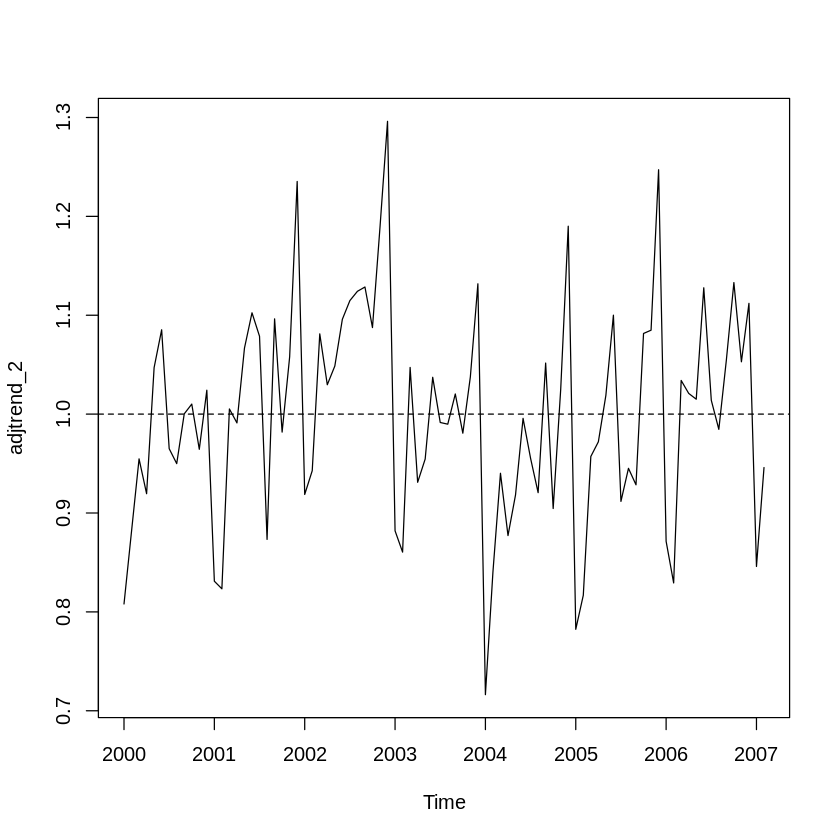

In [254]:
trend_2=fitted(fit_e2)
adjtrend_2=export/trend_2
plot.ts(adjtrend_2)
abline(h=1,lty=2)

- 계절성분 추정

In [66]:
y=factor(cycle(adjtrend_2))

fit1=lm(adjtrend_2~0+y)
summary(fit1)


Call:
lm(formula = adjtrend_2 ~ 0 + y)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.152476 -0.044123  0.003785  0.043146  0.154544 

Coefficients:
    Estimate Std. Error t value Pr(>|t|)    
y1   0.83196    0.02342   35.52   <2e-16 ***
y2   0.86755    0.02342   37.05   <2e-16 ***
y3   1.00281    0.02504   40.05   <2e-16 ***
y4   0.96308    0.02504   38.47   <2e-16 ***
y5   1.00993    0.02504   40.34   <2e-16 ***
y6   1.07778    0.02504   43.05   <2e-16 ***
y7   1.00444    0.02504   40.12   <2e-16 ***
y8   0.96966    0.02504   38.73   <2e-16 ***
y9   1.04004    0.02504   41.54   <2e-16 ***
y10  1.02563    0.02504   40.97   <2e-16 ***
y11  1.05885    0.02504   42.29   <2e-16 ***
y12  1.17665    0.02504   47.00   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06624 on 74 degrees of freedom
Multiple R-squared:  0.9963,	Adjusted R-squared:  0.9957 
F-statistic:  1643 on 12 and 74 DF,  p-value: < 2.2e-16


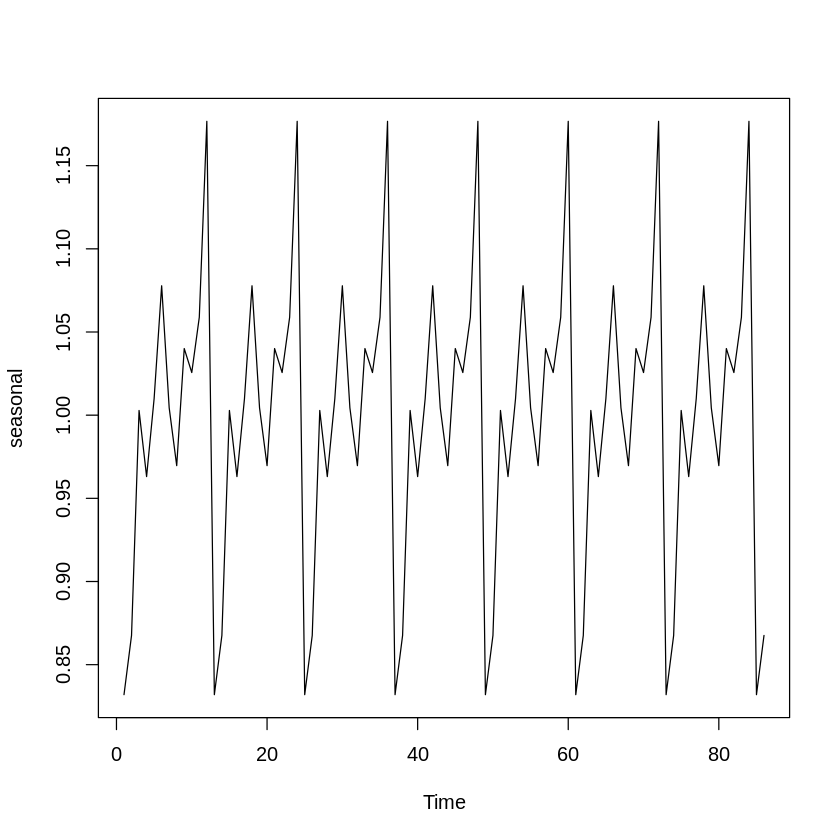

In [67]:
seasonal=fitted(fit1)
ts.plot(seasonal)

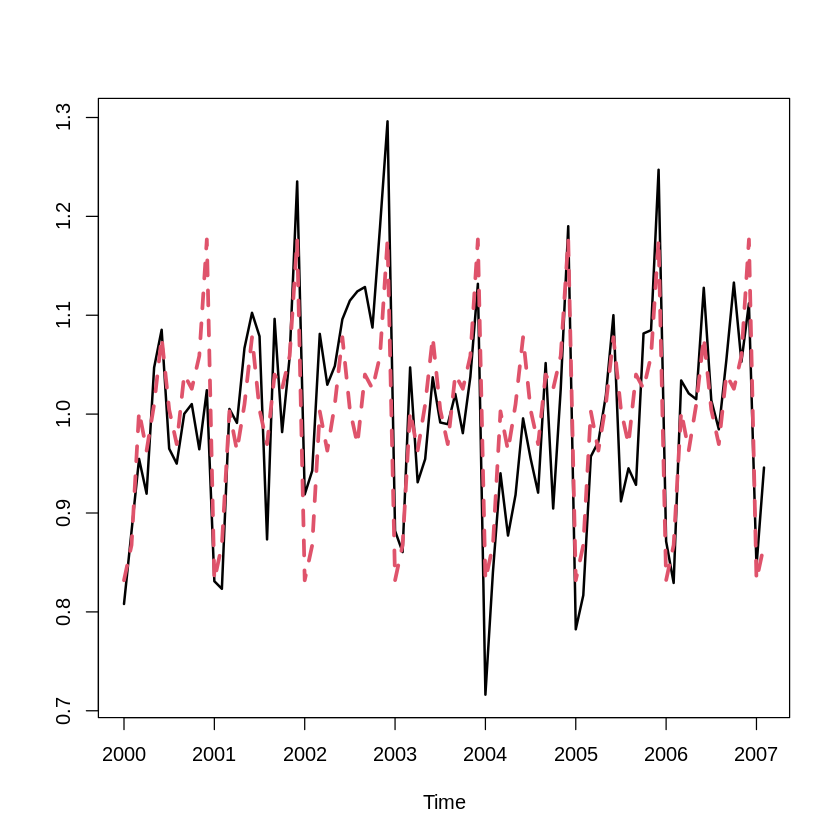

In [68]:
ts.plot(adjtrend_2,seasonal,col=1:2,lty=1:2,lwd=2:3)

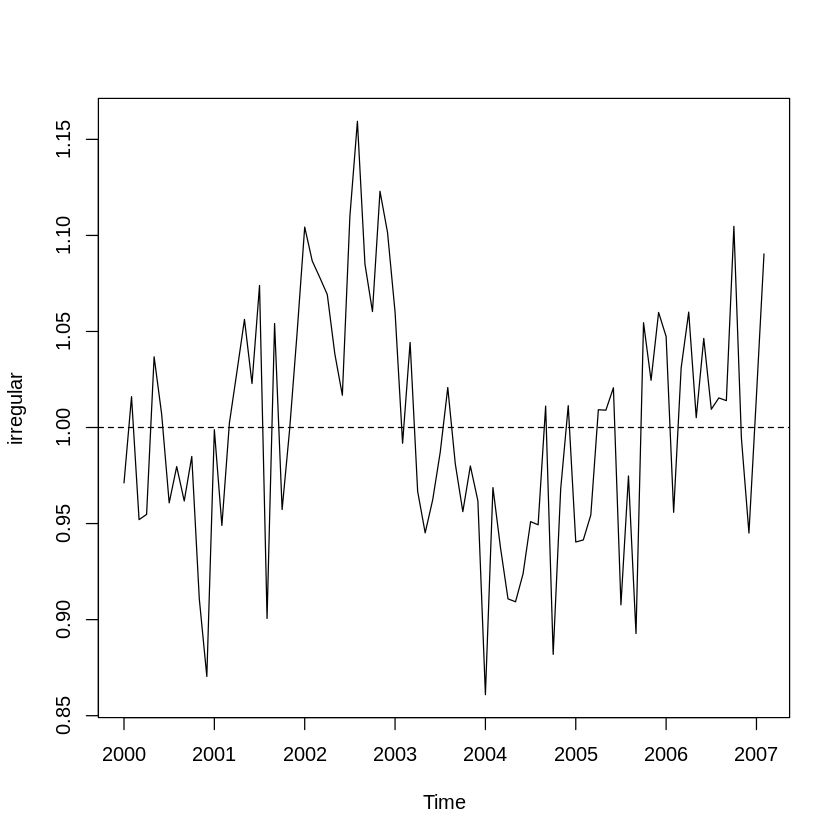

In [69]:
irregular=export/(trend_2*seasonal)
ts.plot(irregular)
abline(h=1,lty=2)

In [70]:
t.test(irregular,mu=1)


	One Sample t-test

data:  irregular
t = 0, df = 85, p-value = 1
alternative hypothesis: true mean is not equal to 1
95 percent confidence interval:
 0.9867743 1.0132257
sample estimates:
mean of x 
        1 


In [71]:
dwtest(lm(irregular~1),alternative="two.sided")


	Durbin-Watson test

data:  lm(irregular ~ 1)
DW = 1.0361, p-value = 1.727e-06
alternative hypothesis: true autocorrelation is not 0


- 추정

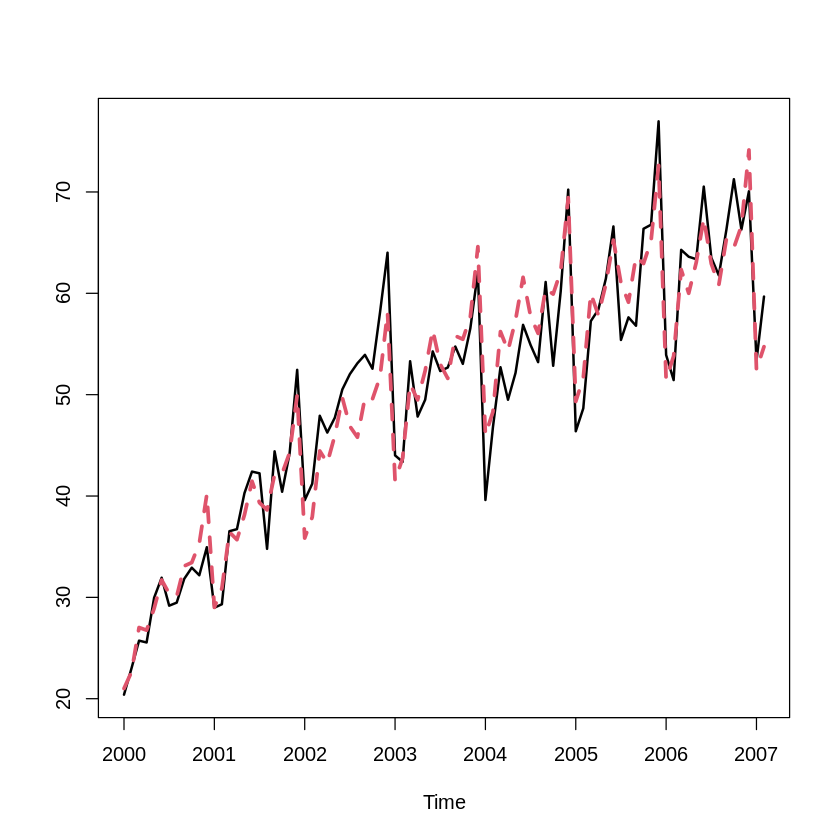

In [72]:
pred_m=trend_2*seasonal
ts.plot(export,pred_m,col=1:2,lty=1:2,lwd=2:3)

In [73]:
sum((export-pred_m)^2)
mean((export-pred_m)^2)

[1] 835.4487

[1] 9.71452

##(3)이동평균을 이용한 분해법

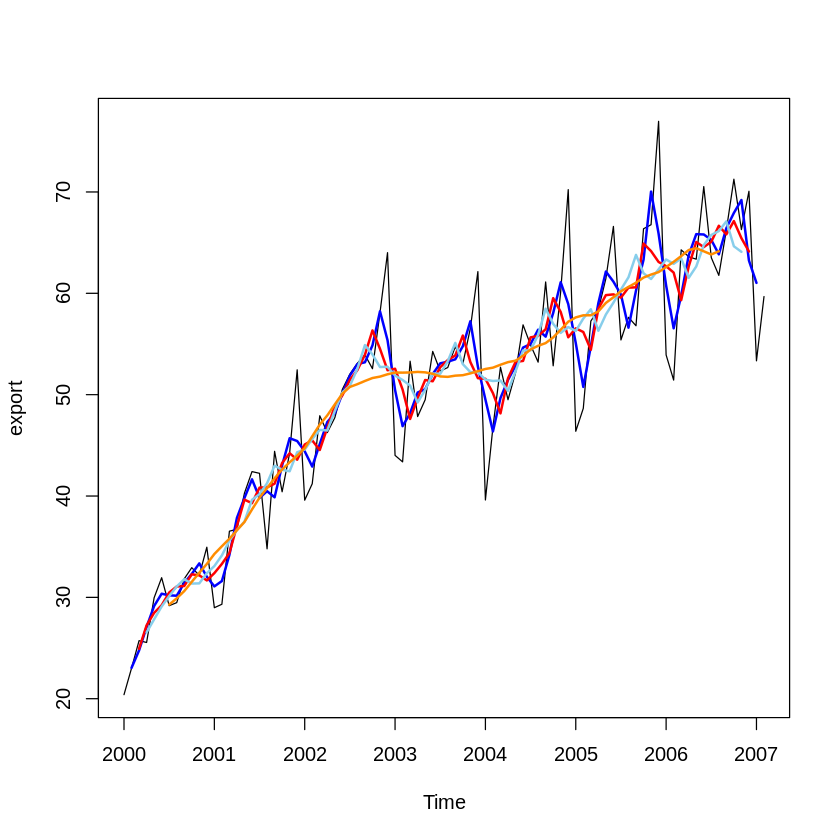

In [259]:
plot.ts(export)
lines(ma(export,3),col="blue",lwd=2)
lines(ma(export,5),col="red",lwd=2)
lines(ma(export,7),col="skyblue",lwd=2)
lines(ma(export,12),col="darkorange",lwd=2)

- 1.추세성분 : 계절주기와 동일한 m을 이용한 중심이동평균

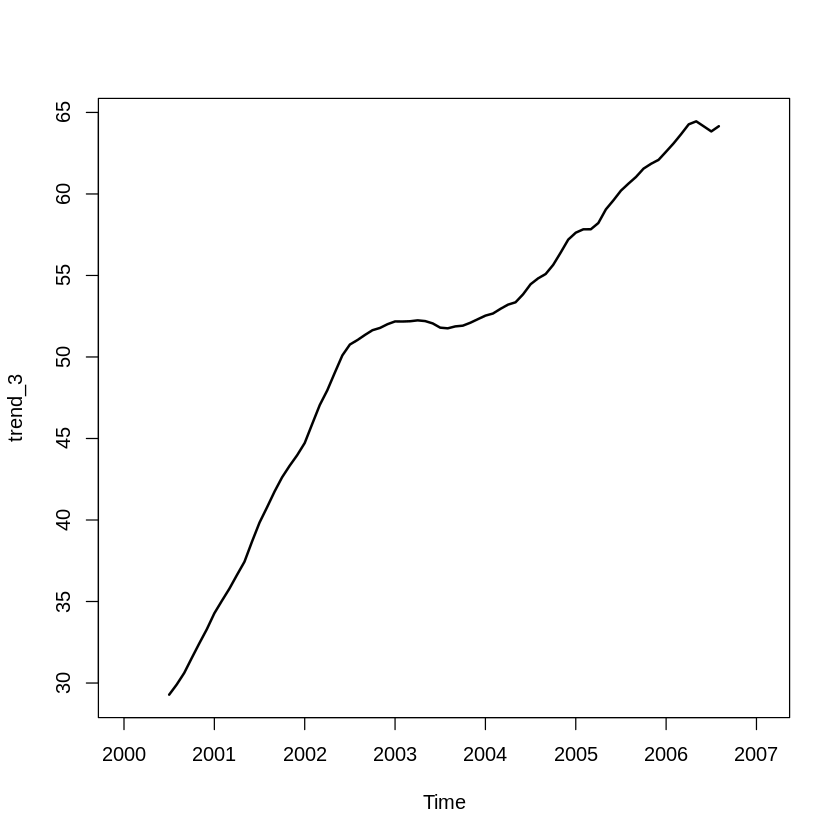

In [260]:
trend_3=ma(export,12)
plot.ts(trend_3,lwd=2)

- 2.계절성분

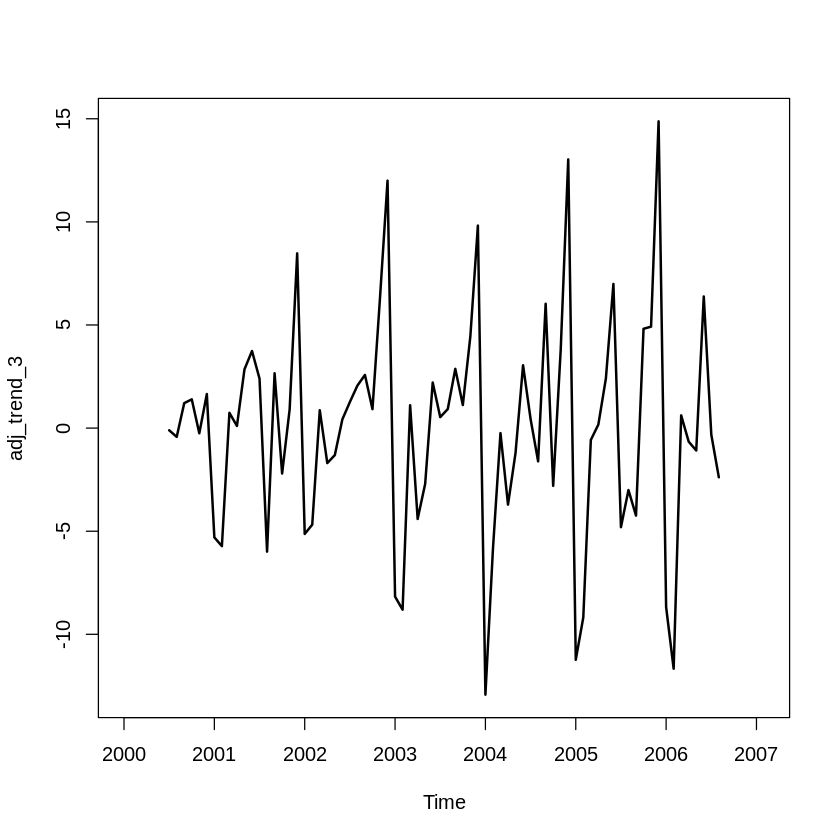

In [261]:
adj_trend_3=export-trend_3
plot.ts(adj_trend_3,lwd=2)

In [262]:
summary(lm(adj_trend_3~0+factor(cycle(adj_trend_3))))


Call:
lm(formula = adj_trend_3 ~ 0 + factor(cycle(adj_trend_3)))

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3226 -1.4141  0.3492  1.8005  4.9008 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
factor(cycle(adj_trend_3))1   -8.5735     1.1268  -7.608 1.89e-10 ***
factor(cycle(adj_trend_3))2   -7.6545     1.1268  -6.793 4.90e-09 ***
factor(cycle(adj_trend_3))3    0.4189     1.1268   0.372  0.71135    
factor(cycle(adj_trend_3))4   -1.6997     1.1268  -1.508  0.13654    
factor(cycle(adj_trend_3))5   -0.1744     1.1268  -0.155  0.87752    
factor(cycle(adj_trend_3))6    3.7982     1.1268   3.371  0.00129 ** 
factor(cycle(adj_trend_3))7   -0.0850     1.0432  -0.081  0.93533    
factor(cycle(adj_trend_3))8   -1.4908     1.0432  -1.429  0.15803    
factor(cycle(adj_trend_3))9    1.8514     1.1268   1.643  0.10544    
factor(cycle(adj_trend_3))10   0.5410     1.1268   0.480  0.63286    
factor(cycle(adj_trend_3))11   3.3563     1.1268   2.97

In [79]:
seasonal_3=tapply(adj_trend_3,cycle(adj_trend_3),function(y) mean(y,na.rm=T))
seasonal_3

1          2          3          4          5          6          7 
-8.5734722 -7.6545139  0.4188889 -1.6996528 -0.1743750  3.7981944 -0.0850000 
         8          9         10         11         12 
-1.4907738  1.8513889  0.5409722  3.3563194  9.9746528

In [80]:
mean(seasonal_3)

[1] 0.02188575

In [81]:
seasonal_3=seasonal_3-mean(seasonal_3)
seasonal_3

1          2          3          4          5          6          7 
-8.5953580 -7.6763996  0.3970031 -1.7215385 -0.1962607  3.7763087 -0.1068857 
         8          9         10         11         12 
-1.5126596  1.8295031  0.5190865  3.3344337  9.9527670

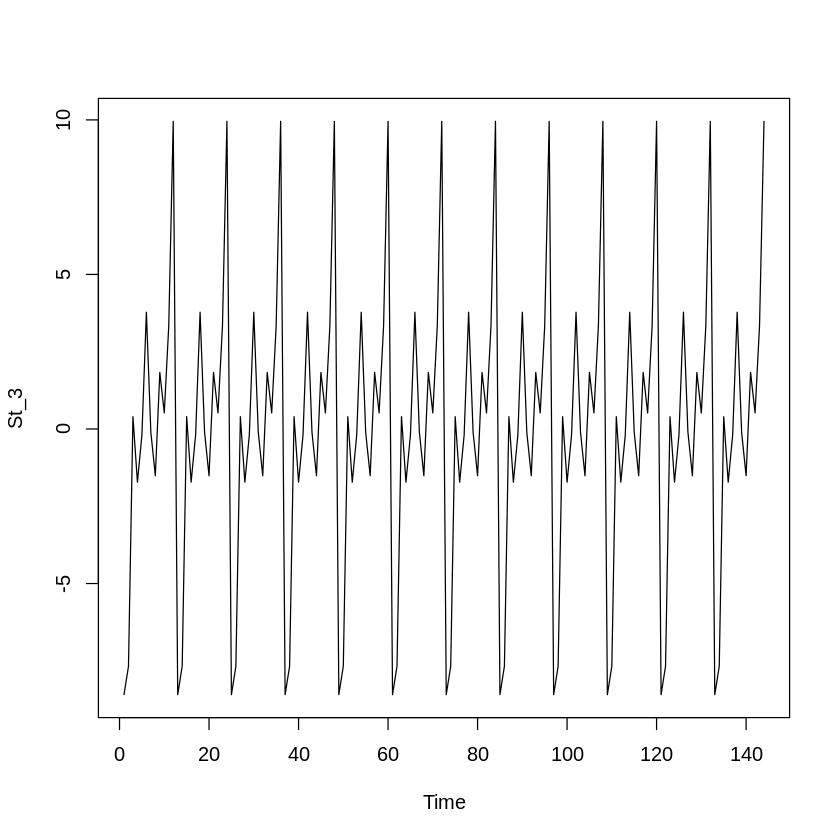

In [82]:
St_3=rep(seasonal_3,12)
plot.ts(St_3)

- 추정

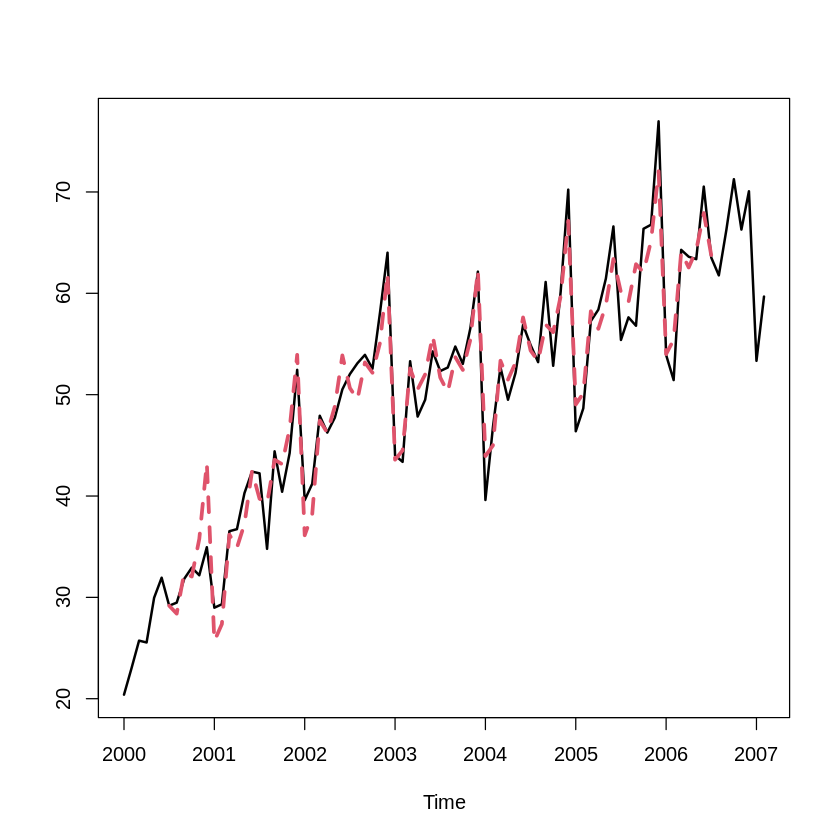

In [86]:
fit_3=trend_3+St_3[1:86]
ts.plot(export,fit_3,lty=1:2,col=1:2,lwd=2:3)

- decompose 함수사용

In [263]:
dec_fit_e1=decompose(export,"additive")

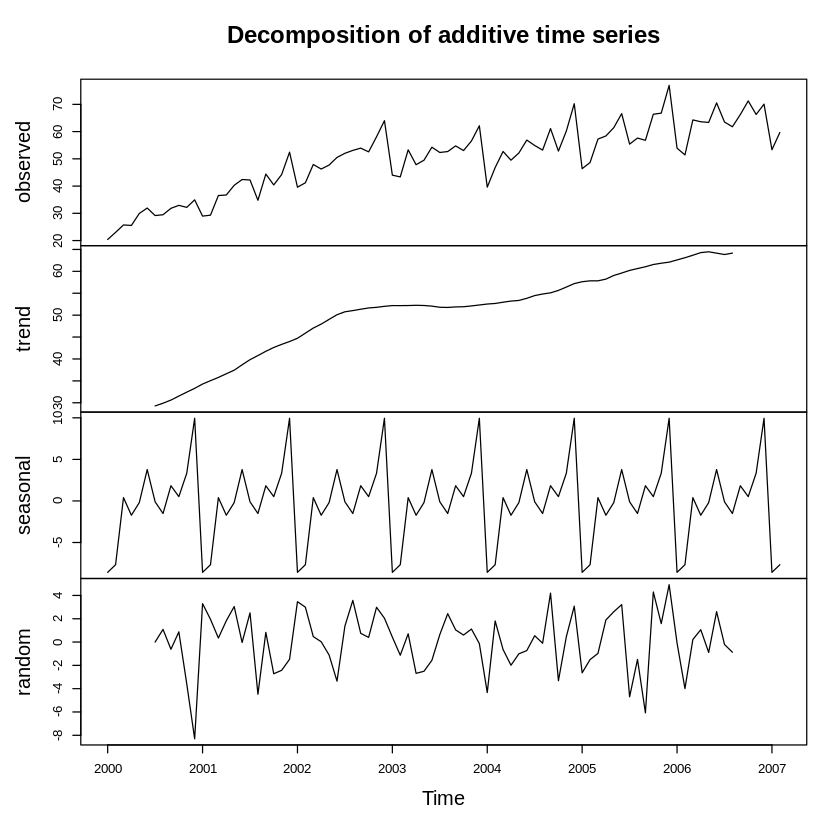

In [105]:
##가법모형 사용
plot(dec_fit_e1)

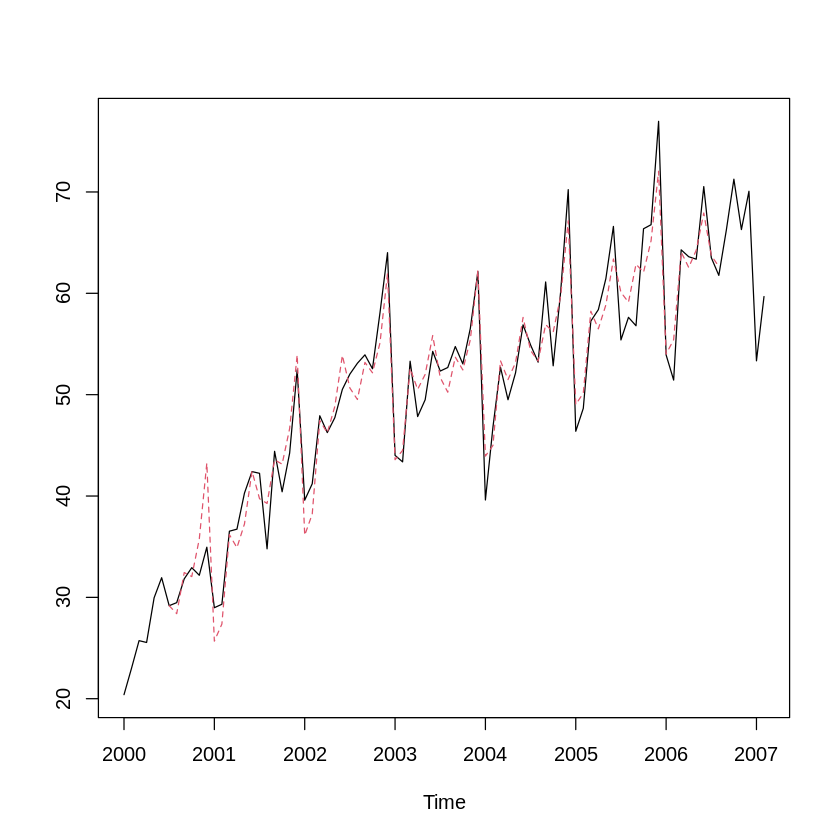

In [265]:
pred_dec_e1=dec_fit_e1$trend+dec_fit_e1$seasonal

ts.plot(export,pred_dec_e1,col=1:2,lty=1:2)

##(4) 추정된 불규칙성분의 분석을 통해 적용된 분해법이 적절했는지 논하여라

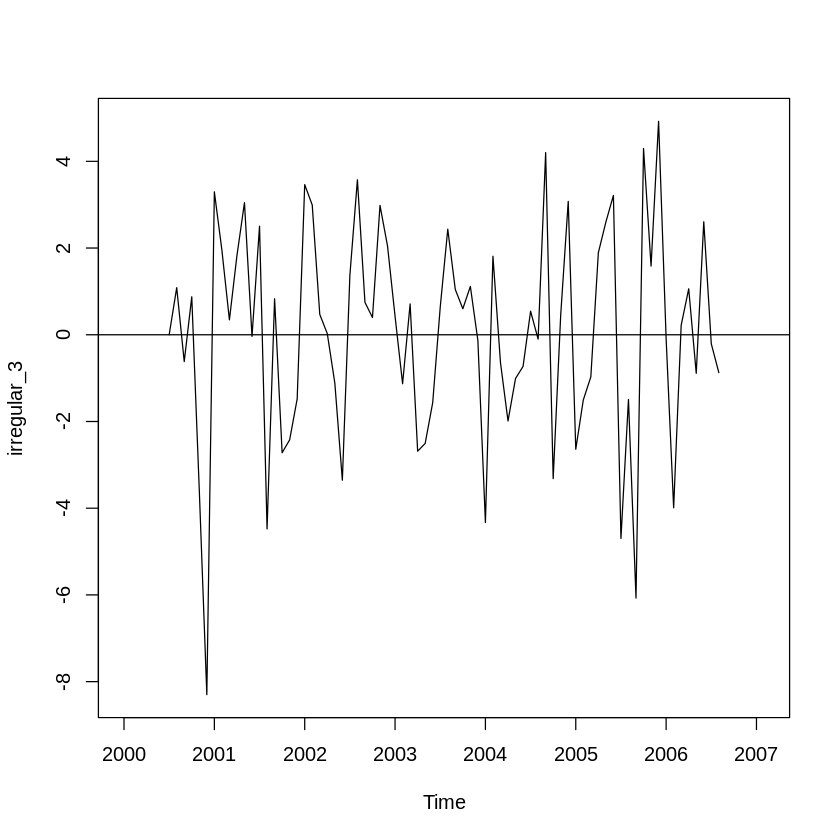

In [272]:
plot(irregular_3)
abline(h=0)

In [275]:
t.test(irregular_3)


	One Sample t-test

data:  irregular_3
t = 0.074013, df = 73, p-value = 0.9412
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.5674456  0.6112171
sample estimates:
 mean of x 
0.02188575 


In [276]:
dwtest(lm(irregular_3~1))


	Durbin-Watson test

data:  lm(irregular_3 ~ 1)
DW = 1.9469, p-value = 0.4094
alternative hypothesis: true autocorrelation is greater than 0


##(5) 각 분해법에 의한 결과를 1-시차 후 예측오차의 제곱합 기준하에서 2번의 결과와 예측력을비교

In [282]:
sum((export-pred_m)^2)  ##SSE 추세분석이용

[1] 835.4487

In [278]:
sum((export-fit_3)^2,na.rm=T)   ##이동평균모형

[1] 472.3815

In [292]:
sum((export-fitted(fit_ex))^2) ##2번모형에서의 SSE

[1] 1118.418

# 5번 "usapass.txt"는 미국 월별비행기 승객수의 시계열자료.log변환후 분석


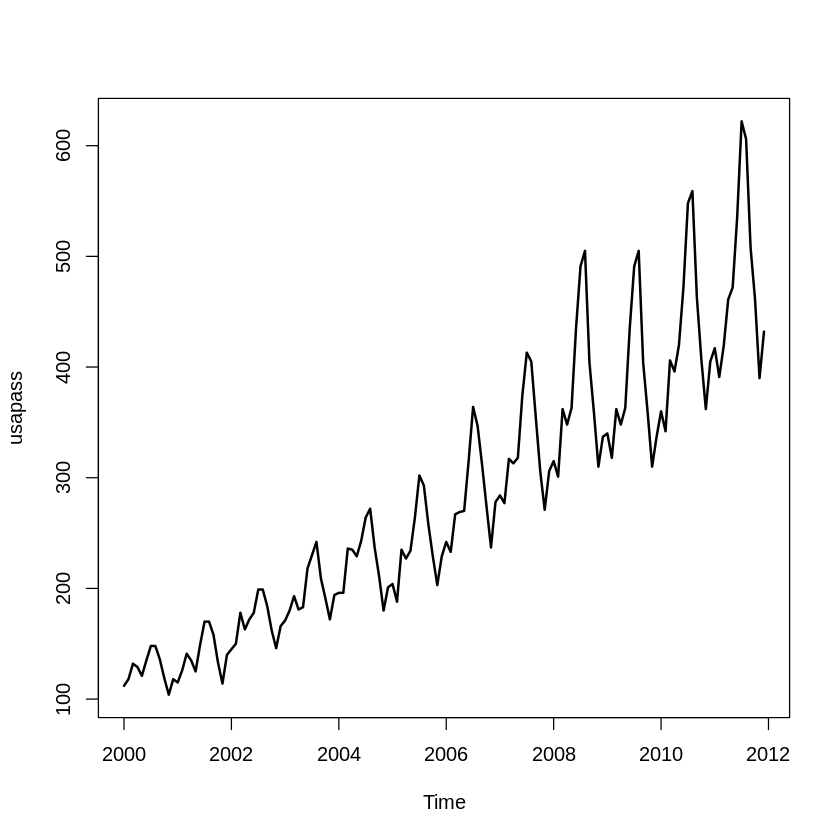

In [109]:
u=scan("usapass.txt")
t=1:length(u)
usapass=ts(u,start=c(2000,1),frequency=12)
plot.ts(usapass,lwd=2)

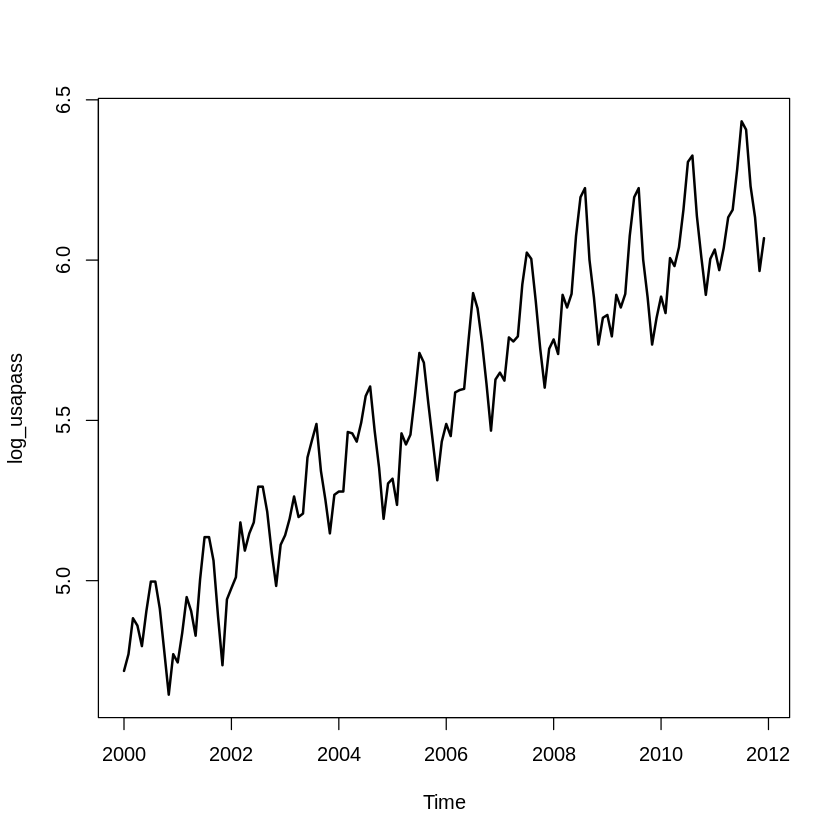

In [110]:
log_usapass=log(usapass)
plot.ts(log_usapass,lwd=2)

##(1) 왜 log 변환이 필요한지에 대해 설명

- 데이터에서 이분산성이 존재하므로
log변환을 하였더니 진폭이 시간의 흐름에따라 거의일정해짐을 알 수 있다

##(2) 추세모형을 적합시킨 후 잔차분석

- 지시함수를 이용한 계절성분 추정

In [304]:
t_us=1:length(usapass)
y_us=factor(cycle(usapass))

In [305]:
reg=lm(log_usapass~0+t_us+y_us,data=log_usapass)
summary(reg)


Call:
lm(formula = log_usapass ~ 0 + t_us + y_us, data = log_usapass)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.159814 -0.044426  0.000623  0.045572  0.151846 

Coefficients:
        Estimate Std. Error t value Pr(>|t|)    
t_us   0.0100999  0.0001252   80.67   <2e-16 ***
y_us1  4.7246982  0.0198289  238.27   <2e-16 ***
y_us2  4.7026123  0.0198822  236.52   <2e-16 ***
y_us3  4.8342011  0.0199361  242.49   <2e-16 ***
y_us4  4.8015084  0.0199907  240.19   <2e-16 ***
y_us5  4.8009618  0.0200459  239.50   <2e-16 ***
y_us6  4.9237482  0.0201017  244.94   <2e-16 ***
y_us7  5.0296649  0.0201582  249.51   <2e-16 ***
y_us8  5.0223242  0.0202153  248.44   <2e-16 ***
y_us9  4.8708171  0.0202729  240.26   <2e-16 ***
y_us10 4.7357833  0.0203312  232.93   <2e-16 ***
y_us11 4.5905564  0.0203901  225.14   <2e-16 ***
y_us12 4.7032829  0.0204496  229.99   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06224 on 131 degree

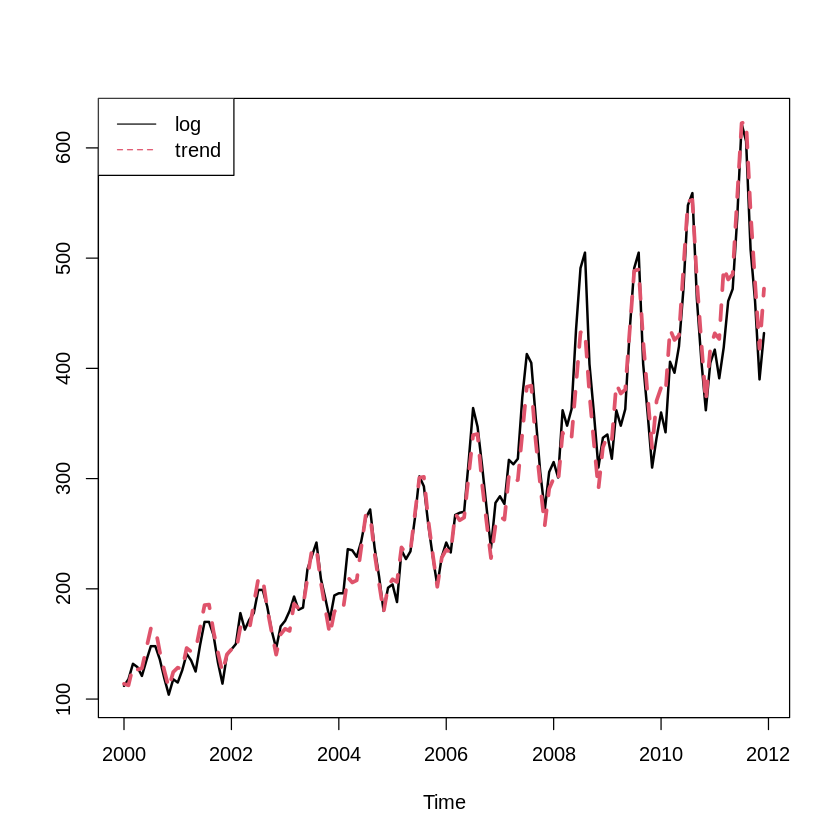

In [300]:
ts.plot(usapass,exp(fitted(reg)),col=1:2,lty=1:2,lwd=2:3)
legend("topleft",lty=1:2,col=1:2,c("log","trend"))

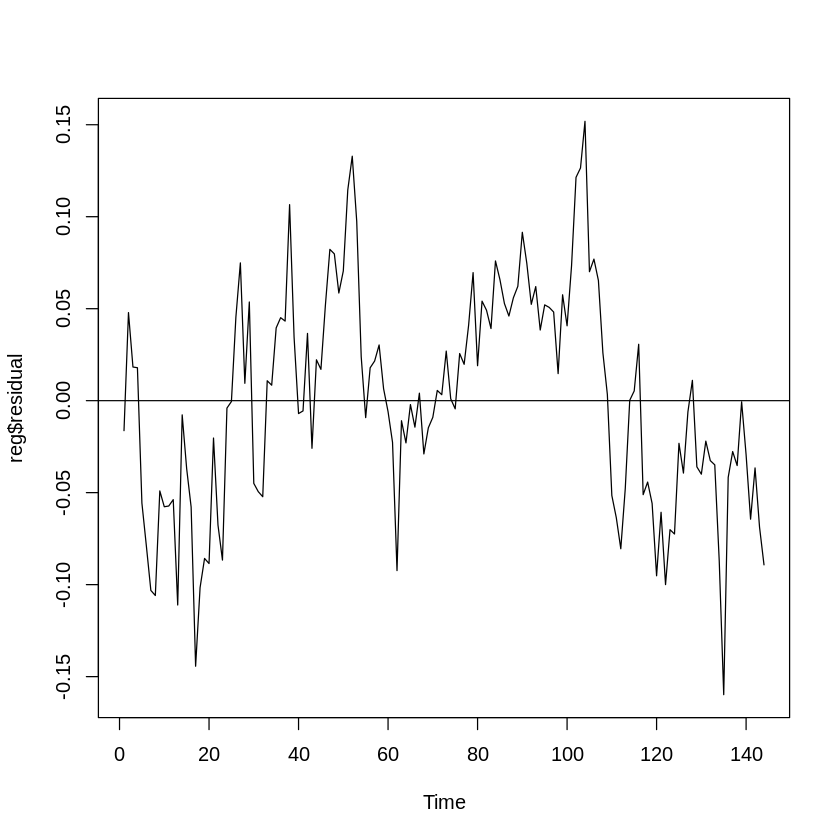

In [301]:
plot.ts(reg$residual)
abline(h=0)

In [303]:
t.test(reg$residual)


	One Sample t-test

data:  reg$residual
t = -2.4845e-16, df = 143, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.009812747  0.009812747
sample estimates:
    mean of x 
-1.233374e-18 


In [302]:
dwtest(reg,alternative="two.sided")


	Durbin-Watson test

data:  reg
DW = 0.40831, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is not 0


- 적합값 SSE / MSE 구하기

In [118]:
sum((usapass-exp(fitted(reg)))^2)
mean((usapass-exp(fitted(reg)))^2)

[1] 49268.53

[1] 342.1426

##(3) 평활법

- 이분산성이 존재하므로 승법모형을 사용하는 게 적합해보임

In [307]:
fit_usa_m=HoltWinters(usapass,seasonal="multiplicative")
fit_usa_m

Holt-Winters exponential smoothing with trend and multiplicative seasonal component.

Call:
HoltWinters(x = usapass, seasonal = "multiplicative")

Smoothing parameters:
 alpha: 0.3204565
 beta : 0.02388265
 gamma: 1

Coefficients:
           [,1]
a   464.9721064
b     2.7859138
s1    0.9464640
s2    0.8810274
s3    0.9648716
s4    1.0334898
s5    1.0470250
s6    1.1793118
s7    1.3631491
s8    1.3399425
s9    1.1195987
s10   0.9993794
s11   0.8438225
s12   0.9290880

In [308]:
predict(fit_usa_m,n.ahead = 12,prediction.interval = T,level=0.95)  ##예측구간

,fit,upr,lwr
Jan 2012,442.7161,466.7906,418.6417
Feb 2012,414.5621,439.7344,389.3898
Mar 2012,456.7025,483.5785,429.8265
Apr 2012,492.0608,520.7413,463.3802
May 2012,501.4220,531.4971,471.3469
Jun 2012,568.0599,601.0706,535.0491
Jul 2012,660.4096,697.4920,623.3272
Aug 2012,652.8996,690.8804,614.9188
Sep 2012,548.6541,584.0359,513.2724
Oct 2012,492.5254,526.9921,458.0587


In [309]:
fit_usa=hw(usapass,alpha=fit_usa_m$alpha,beta = fit_usa_m$beta,gamma=fit_usa_m$gamma,
            seasonal="multiplicative",initial="simple",h=12)
fit_usa$model

Holt-Winters' multiplicative method 

Call:
 hw(y = usapass, h = 12, seasonal = "multiplicative", initial = "simple",  

 Call:
     alpha = fit_usa_m$alpha, beta = fit_usa_m$beta, gamma = fit_usa_m$gamma) 

  Smoothing parameters:
    alpha = 0.3205 
    beta  = 0.0239 
    gamma = 1 

  Initial states:
    l = 126.6667 
    b = 1.0833 
    s = 0.9316 0.8211 0.9395 1.0737 1.1684 1.1684
           1.0658 0.9553 1.0184 1.0421 0.9316 0.8842

  sigma:  0.0465

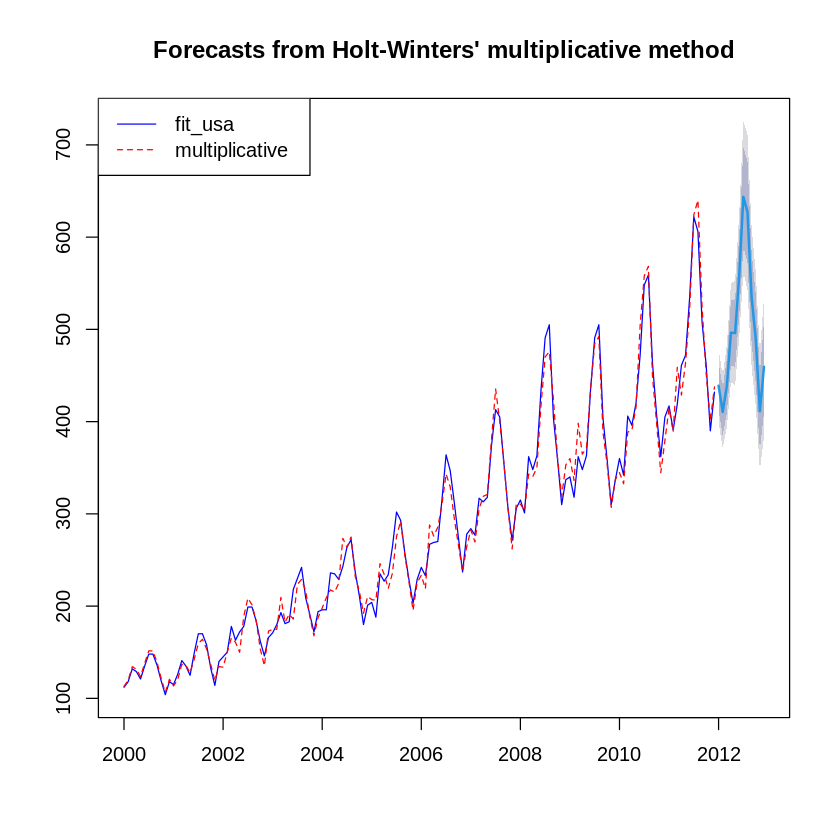

In [310]:
plot(fit_usa,col="blue",lty=1)
lines(fit_usa$fitted,col="red",lty=2)
legend("topleft",lty=1:2,col=c("blue","red"),c("fit_usa","multiplicative"))

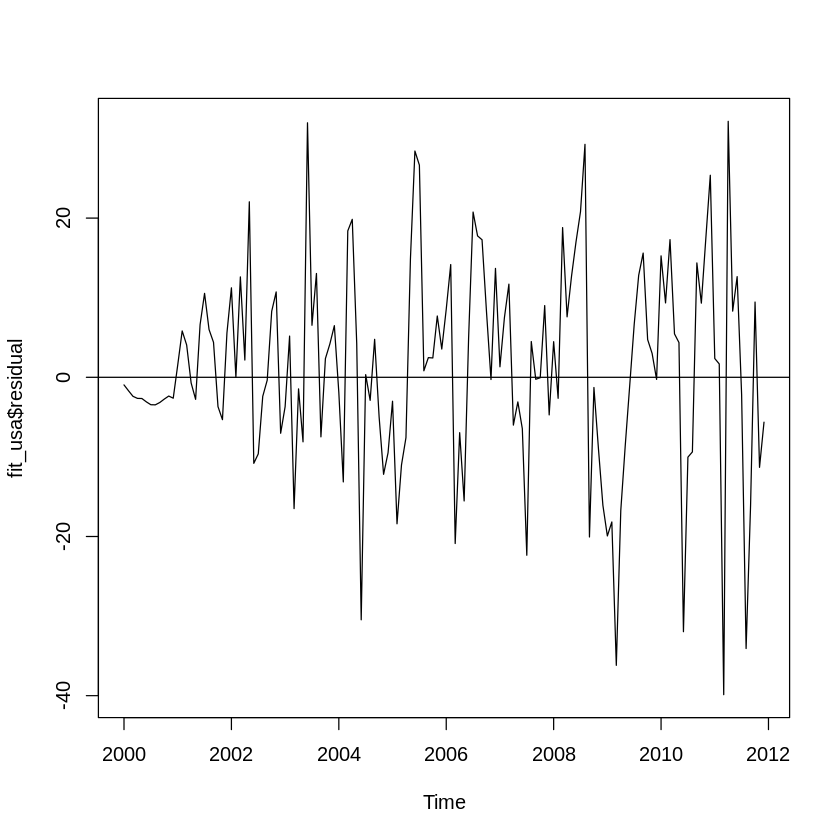

In [313]:
ts.plot(fit_usa$residual)
abline(h=0)

In [314]:
t.test(fit_usa$residual)


	One Sample t-test

data:  fit_usa$residual
t = 1.0873, df = 143, p-value = 0.2787
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.9675137  3.3332414
sample estimates:
mean of x 
 1.182864 


In [131]:
dwtest(lm(fit_usa$residual~1),alternative="two.sided")


	Durbin-Watson test

data:  lm(fit_usa$residual ~ 1)
DW = 1.4311, p-value = 0.0005873
alternative hypothesis: true autocorrelation is not 0


## (4) 추세에 의한 분해법

### 추세성분 추정

In [322]:
fit_Tu2=lm(log_usapass~t_us+I((t_us)^2))
summary(fit_Tu2)


Call:
lm(formula = log_usapass ~ t_us + I((t_us)^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.29253 -0.09097 -0.02178  0.09452  0.34659 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.734e+00  3.487e-02 135.738  < 2e-16 ***
t_us         1.334e-02  1.110e-03  12.010  < 2e-16 ***
I((t_us)^2) -2.246e-05  7.418e-06  -3.027  0.00293 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1376 on 141 degrees of freedom
Multiple R-squared:  0.9051,	Adjusted R-squared:  0.9038 
F-statistic: 672.6 on 2 and 141 DF,  p-value: < 2.2e-16


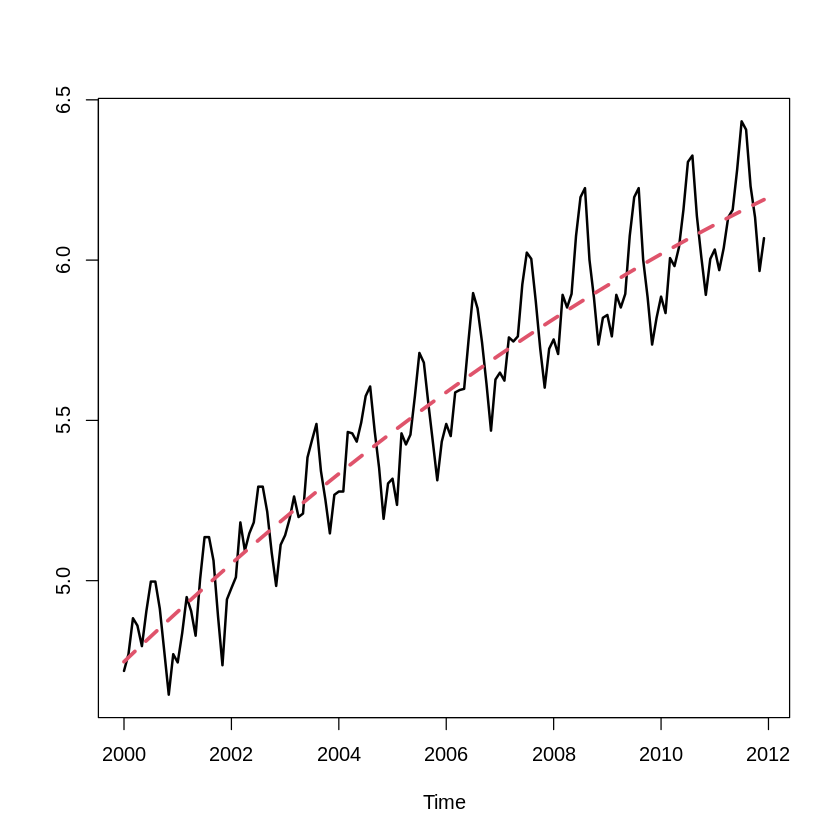

In [323]:
hat_Tu2=fitted(fit_Tu2)
ts.plot(log_usapass,hat_Tu2,col=1:2,lty=1:2,lwd=2:3)

### 계절성분 추정

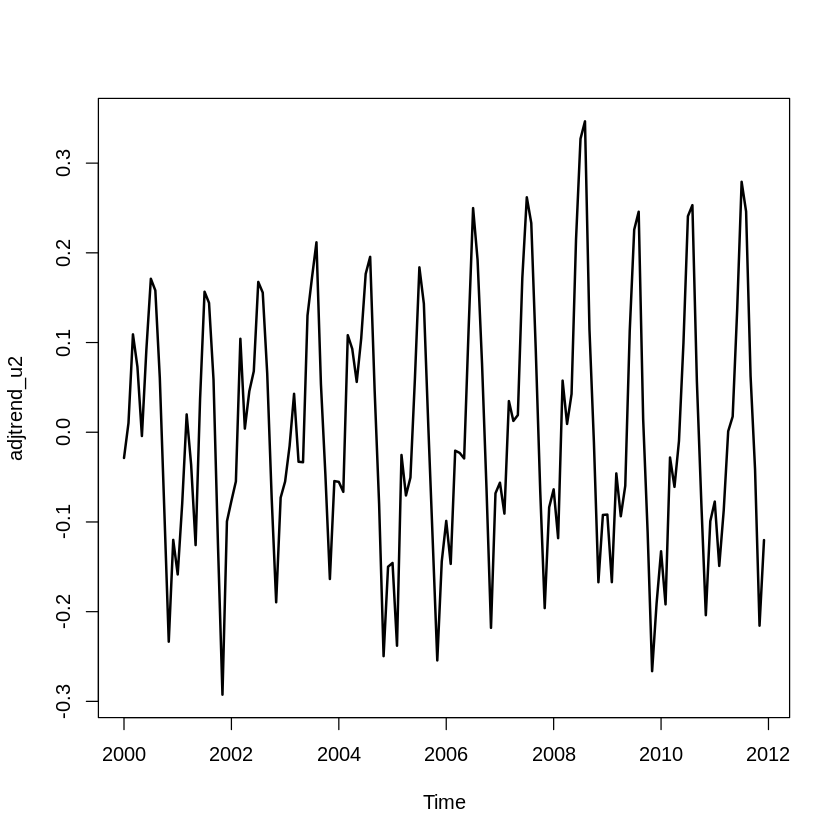

In [324]:
adjtrend_u2=log_usapass-hat_Tu2
plot.ts(adjtrend_u2,lwd=2)

In [325]:
y=factor(cycle(adjtrend_u2))

fit_u2_=lm(adjtrend_u2~0+y)
summary(fit_u2_)


Call:
lm(formula = adjtrend_u2 ~ 0 + y)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.128997 -0.040338  0.001791  0.030654  0.136133 

Coefficients:
    Estimate Std. Error t value Pr(>|t|)    
y1  -0.08668    0.01467  -5.909 2.76e-08 ***
y2  -0.10897    0.01467  -7.429 1.22e-11 ***
y3   0.02246    0.01467   1.531    0.128    
y4  -0.01035    0.01467  -0.705    0.482    
y5  -0.01096    0.01467  -0.748    0.456    
y6   0.11180    0.01467   7.622 4.34e-12 ***
y7   0.21773    0.01467  14.844  < 2e-16 ***
y8   0.21046    0.01467  14.348  < 2e-16 ***
y9   0.05906    0.01467   4.026 9.50e-05 ***
y10 -0.07582    0.01467  -5.169 8.50e-07 ***
y11 -0.22085    0.01467 -15.056  < 2e-16 ***
y12 -0.10788    0.01467  -7.355 1.81e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05081 on 132 degrees of freedom
Multiple R-squared:  0.8723,	Adjusted R-squared:  0.8607 
F-statistic: 75.13 on 12 and 132 DF,  p-value: < 2.2e-16


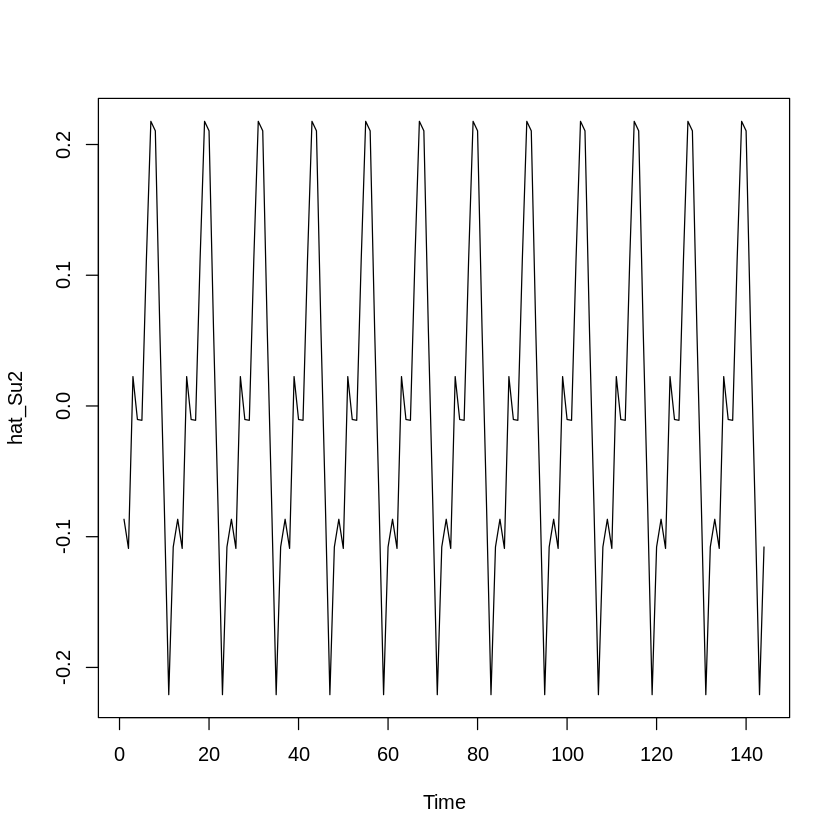

In [326]:
##계절성분 추정
hat_Su2=fitted(fit_u2_)
ts.plot(hat_Su2)

###불규칙성분 추정

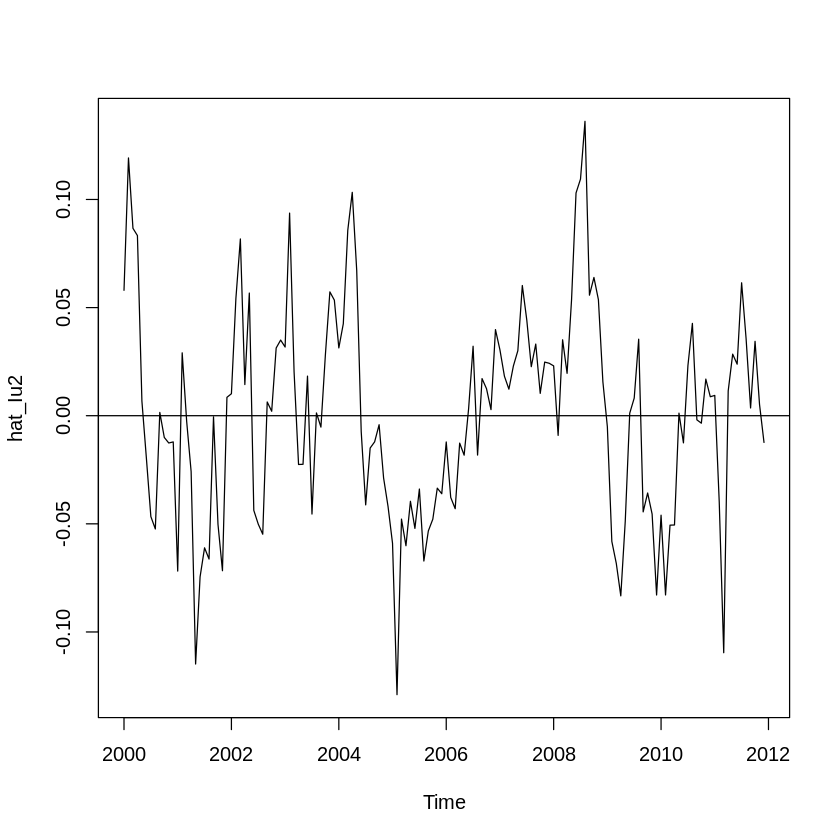

In [327]:
hat_Iu2=log_usapass-hat_Tu2-hat_Su2
ts.plot(hat_Iu2)
abline(h=0)

- 양의 상관관계가 존재하는것같음
- 0에 대해 대칭은 맞는 것 같음

In [328]:
t.test(hat_Iu2)


	One Sample t-test

data:  hat_Iu2
t = -1.2961e-16, df = 143, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.008041498  0.008041498
sample estimates:
    mean of x 
-5.272898e-19 


In [352]:
dwtest(lm(hat_Iu2~1))


	Durbin-Watson test

data:  lm(hat_Iu2 ~ 1)
DW = 0.60733, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


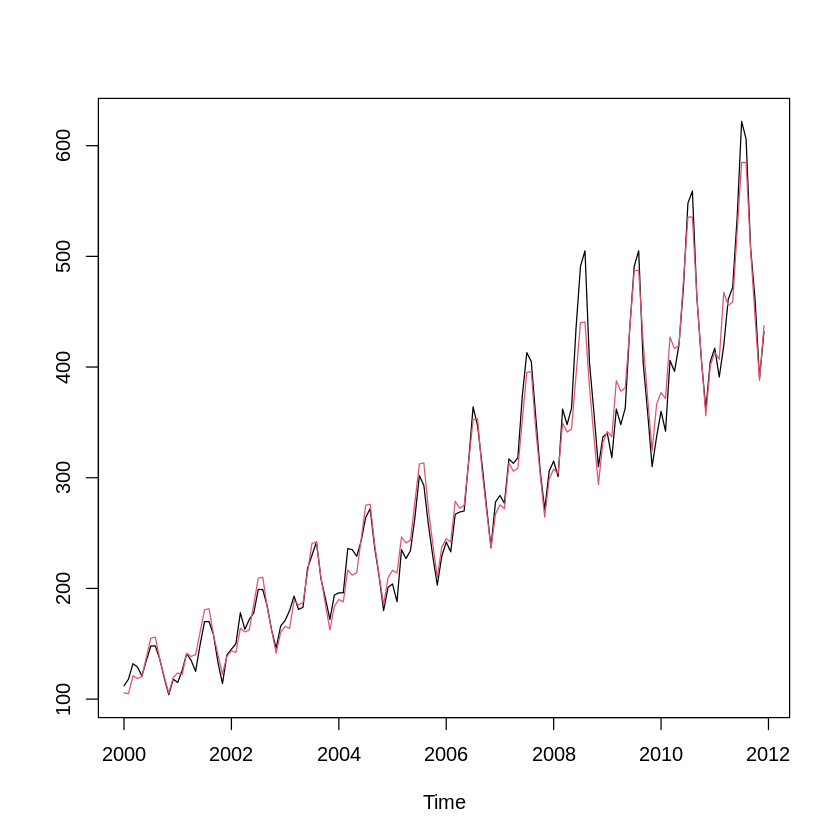

In [329]:
pred_u2=hat_Tu2+hat_Su2

ts.plot(usapass,exp(pred_u2),col=1:2)

##(5) 각 분석방법에 의한 결과를 1-시차 후 예측오차의 제곱합 (SSE) 기준하에서 비교


- (2) 추세모형에 대한 SSE

In [317]:
sum((usapass-exp(fitted(reg)))^2)

[1] 49268.53

- (3) 평활법을 적용한 SSE

In [316]:
sum((usapass-fitted(fit_usa))^2)  ##평활법

[1] 24571.16

- (4) 분해법을 적용한 SSE

In [350]:
sum((usapass-exp(pred_u2))^2) ##추세에 의한 분해법 SSE


[1] 31139.07